In [877]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_China (1).csv")

In [0]:
raw_seq = raw_seq.rename(columns={'Confirmed Deaths': 'China Confirmed Deaths', \
                                  'Confirmed Recovered': 'China Recovered'})

In [880]:
raw = raw_seq.iloc[4:]

raw.head()

,Dates,China Confirmed Cases,China Confirmed Deaths,China Recovered
4,01/26/2020,2075,56,49
5,01/27/2020,2877,82,58
6,01/28/2020,5509,131,101
7,01/29/2020,6087,133,120
8,01/30/2020,8141,171,135


In [0]:
china_confirmed_cases = raw_seq['China Confirmed Cases']
china_deaths = raw_seq['China Confirmed Deaths']
china_recovered = raw_seq['China Recovered']

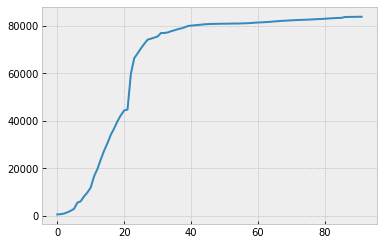

In [882]:
raw_seq['China Confirmed Cases'].plot()

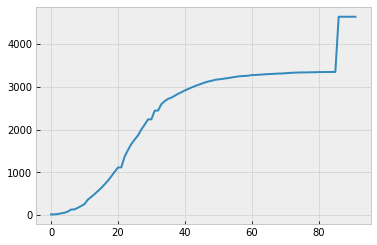

In [883]:
raw_seq['China Confirmed Deaths'].plot()

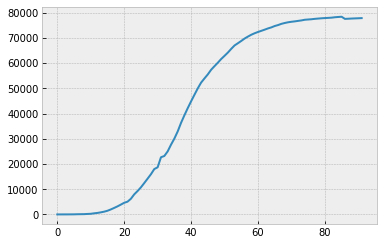

In [884]:
raw_seq['China Recovered'].plot()

In [885]:
# univariate cnn example
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(china_confirmed_cases, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(china_confirmed_cases)
pred_val = []
for i in range(x):
  i=china_confirmed_cases[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 11ms/step
[[564.2025]]
1/1 [==============================] - 0s 3ms/step
[[659.4339]]
1/1 [==============================] - 0s 3ms/step
[[937.1091]]
1/1 [==============================] - 0s 640us/step
[[1424.2935]]
1/1 [==============================] - 0s 943us/step
[[2094.9238]]
1/1 [==============================] - 0s 504us/step
[[2898.8787]]
1/1 [==============================] - 0s 1ms/step
[[5537.2935]]
1/1 [==============================] - 0s 490us/step
[[6116.701]]
1/1 [==============================] - 0s 624us/step
[[8175.707]]
1/1 [==============================] - 0s 928us/step
[[9840.756]]
1/1 [==============================] - 0s 2ms/step
[[11934.846]]
1/1 [==============================] - 0s 1ms/step
[[16685.395]]
1/1 [==============================] - 0s 2ms/step
[[19778.916]]
1/1 [==============================] - 0s 1ms/step
[[23779.645]]
1/1 [==============================] - 0s 1ms/step
[[27521.74]]
1/1 [==============

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['China Predicted Cases']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t1 = raw_seq


In [887]:
print(t1)

         Dates  China Confirmed Cases  ...  China Recovered  China Predicted Cases
0   01/22/2020                    548  ...               28             564.202515
1   01/23/2020                    643  ...               30             659.433899
2   01/24/2020                    920  ...               36             937.109070
3   01/25/2020                   1406  ...               39            1424.293457
4   01/26/2020                   2075  ...               49            2094.923828
5   01/27/2020                   2877  ...               58            2898.878662
6   01/28/2020                   5509  ...              101            5537.293457
7   01/29/2020                   6087  ...              120            6116.701172
8   01/30/2020                   8141  ...              135            8175.707031
9   01/31/2020                   9802  ...              214            9840.755859
10  02/01/2020                  11891  ...              275           11934.845703
11  

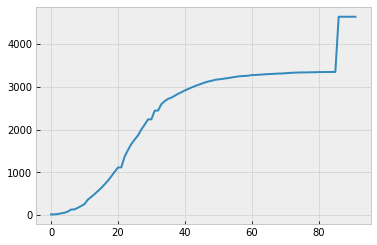

In [888]:
t1['China Confirmed Deaths'].plot()

In [889]:
# Ontario Deaths
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(china_deaths, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(china_deaths)
pred_val = []
for i in range(x):
  i=china_deaths[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 11ms/step
[[25.944098]]
1/1 [==============================] - 0s 1ms/step
[[26.95047]]
1/1 [==============================] - 0s 1ms/step
[[35.001465]]
1/1 [==============================] - 0s 1ms/step
[[51.103462]]
1/1 [==============================] - 0s 2ms/step
[[65.1927]]
1/1 [==============================] - 0s 790us/step
[[91.35844]]
1/1 [==============================] - 0s 1ms/step
[[140.6708]]
1/1 [==============================] - 0s 734us/step
[[142.68356]]
1/1 [==============================] - 0s 1ms/step
[[180.9258]]
1/1 [==============================] - 0s 935us/step
[[223.19351]]
1/1 [==============================] - 0s 1ms/step
[[269.48676]]
1/1 [==============================] - 0s 738us/step
[[372.13693]]
1/1 [==============================] - 0s 1ms/step
[[436.54495]]
1/1 [==============================] - 0s 920us/step
[[502.9657]]
1/1 [==============================] - 0s 751us/step
[[575.4247]]
1/1 [===============

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['China Predicted Deaths']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t2 = raw_seq

In [891]:
print(t2)

         Dates  ...  China Predicted Deaths
0   01/22/2020  ...               25.944098
1   01/23/2020  ...               26.950470
2   01/24/2020  ...               35.001465
3   01/25/2020  ...               51.103462
4   01/26/2020  ...               65.192703
5   01/27/2020  ...               91.358437
6   01/28/2020  ...              140.670807
7   01/29/2020  ...              142.683563
8   01/30/2020  ...              180.925797
9   01/31/2020  ...              223.193512
10  02/01/2020  ...              269.486755
11  02/02/2020  ...              372.136932
12  02/03/2020  ...              436.544952
13  02/04/2020  ...              502.965698
14  02/05/2020  ...              575.424683
15  02/06/2020  ...              645.870911
16  02/07/2020  ...              731.412781
17  02/08/2020  ...              818.967407
18  02/09/2020  ...              919.604797
19  02/10/2020  ...             1027.286987
20  02/11/2020  ...             1127.924316
21  02/12/2020  ...             

In [892]:
t2.tail(10)

,Dates,China Confirmed Cases,China Confirmed Deaths,China Recovered,China Predicted Cases,China Predicted Deaths
82,04/13/2020,83213,3345,78039,83430.664062,3375.158936
83,04/14/2020,83306,3345,78200,83523.890625,3375.158936
84,04/15/2020,83356,3346,78311,83574.000000,3376.165771
85,04/16/2020,83403,3346,78401,83621.140625,3376.165771
86,04/17/2020,83760,4636,77552,83979.007812,4674.388672
87,04/18/2020,83787,4636,77614,84006.062500,4674.388672
88,04/19/2020,83805,4636,77690,84024.117188,4674.388672
89,04/20/2020,83817,4636,77745,84036.140625,4674.388672
90,04/21/2020,83853,4636,77799,84072.218750,4674.388672
91,04/22/2020,83868,4636,77861,84087.250000,4674.388672


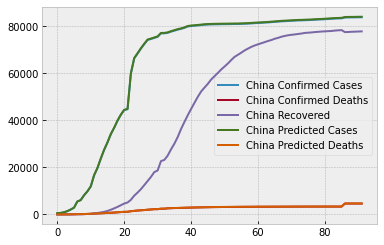

In [893]:
t2.plot()

In [894]:
# china Recovered
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(china_recovered, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(china_recovered)
pred_val = []
for i in range(x):
  i=china_recovered[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 11ms/step
[[42.669228]]
1/1 [==============================] - 0s 1ms/step
[[44.66902]]
1/1 [==============================] - 0s 2ms/step
[[50.66838]]
1/1 [==============================] - 0s 1ms/step
[[53.66806]]
1/1 [==============================] - 0s 714us/step
[[63.667007]]
1/1 [==============================] - 0s 645us/step
[[72.66604]]
1/1 [==============================] - 0s 828us/step
[[115.6615]]
1/1 [==============================] - 0s 835us/step
[[134.65947]]
1/1 [==============================] - 0s 830us/step
[[149.65787]]
1/1 [==============================] - 0s 878us/step
[[228.64948]]
1/1 [==============================] - 0s 829us/step
[[289.643]]
1/1 [==============================] - 0s 3ms/step
[[477.623]]
1/1 [==============================] - 0s 1ms/step
[[628.6071]]
1/1 [==============================] - 0s 659us/step
[[857.5827]]
1/1 [==============================] - 0s 628us/step
[[1129.5538]]
1/1 [============

In [0]:
pred_val
predict= np.concatenate(pred_val)
Predict_cases=pd.DataFrame(predict)
Predict_cases['China Predicted Recovered']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t3 = raw_seq

In [896]:
raw_seq

,Dates,China Confirmed Cases,China Confirmed Deaths,China Recovered,China Predicted Cases,China Predicted Deaths,China Predicted Recovered
0,01/22/2020,548,17,28,564.202515,25.944098,42.669228
1,01/23/2020,643,18,30,659.433899,26.950470,44.669022
2,01/24/2020,920,26,36,937.109070,35.001465,50.668381
3,01/25/2020,1406,42,39,1424.293457,51.103462,53.668060
4,01/26/2020,2075,56,49,2094.923828,65.192703,63.667007
5,01/27/2020,2877,82,58,2898.878662,91.358437,72.666039
6,01/28/2020,5509,131,101,5537.293457,140.670807,115.661499
7,01/29/2020,6087,133,120,6116.701172,142.683563,134.659470
8,01/30/2020,8141,171,135,8175.707031,180.925797,149.657867
9,01/31/2020,9802,213,214,9840.755859,223.193512,228.649475


In [897]:
print(t3)

         Dates  ...  China Predicted Recovered
0   01/22/2020  ...                  42.669228
1   01/23/2020  ...                  44.669022
2   01/24/2020  ...                  50.668381
3   01/25/2020  ...                  53.668060
4   01/26/2020  ...                  63.667007
5   01/27/2020  ...                  72.666039
6   01/28/2020  ...                 115.661499
7   01/29/2020  ...                 134.659470
8   01/30/2020  ...                 149.657867
9   01/31/2020  ...                 228.649475
10  02/01/2020  ...                 289.643005
11  02/02/2020  ...                 477.622986
12  02/03/2020  ...                 628.607117
13  02/04/2020  ...                 857.582703
14  02/05/2020  ...                1129.553833
15  02/06/2020  ...                1491.515259
16  02/07/2020  ...                2013.459961
17  02/08/2020  ...                2610.400146
18  02/09/2020  ...                3233.340332
19  02/10/2020  ...                3932.273438
20  02/11/202

In [898]:
t3.tail(10)

,Dates,China Confirmed Cases,China Confirmed Deaths,China Recovered,China Predicted Cases,China Predicted Deaths,China Predicted Recovered
82,04/13/2020,83213,3345,78039,83430.664062,3375.158936,78046.171875
83,04/14/2020,83306,3345,78200,83523.890625,3375.158936,78207.164062
84,04/15/2020,83356,3346,78311,83574.000000,3376.165771,78318.156250
85,04/16/2020,83403,3346,78401,83621.140625,3376.165771,78408.140625
86,04/17/2020,83760,4636,77552,83979.007812,4674.388672,77559.226562
87,04/18/2020,83787,4636,77614,84006.062500,4674.388672,77621.210938
88,04/19/2020,83805,4636,77690,84024.117188,4674.388672,77697.195312
89,04/20/2020,83817,4636,77745,84036.140625,4674.388672,77752.203125
90,04/21/2020,83853,4636,77799,84072.218750,4674.388672,77806.195312
91,04/22/2020,83868,4636,77861,84087.250000,4674.388672,77868.187500


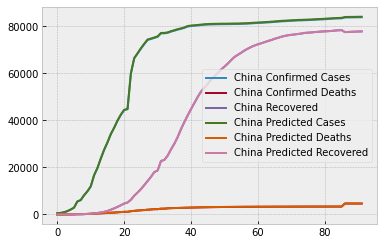

In [899]:
t3.plot()

In [0]:
t3.to_csv (r'/content/drive/My Drive/china_og_preds.csv')

In [901]:
from sklearn.metrics import r2_score
score = r2_score(t3['China Confirmed Cases'], t3['China Predicted Cases'])
print(score)
a= score

0.9999541570820261


In [902]:
from sklearn.metrics import r2_score
score = r2_score(t3['China Recovered'], t3['China Predicted Recovered'])
print(score)
b= score

0.9999998833155344


In [903]:
from sklearn.metrics import r2_score
score = r2_score(t3['China Confirmed Deaths'], t3['China Predicted Deaths'])
print(score)
c = score

0.9996033363744617


In [904]:
Average_r2score_ondataset = (a + b + c)/3
print(Average_r2score_ondataset)

0.9998524589240074


In [905]:
pd.set_option('display.max_rows', t3.shape[0]+1)
print(t3)

         Dates  ...  China Predicted Recovered
0   01/22/2020  ...                  42.669228
1   01/23/2020  ...                  44.669022
2   01/24/2020  ...                  50.668381
3   01/25/2020  ...                  53.668060
4   01/26/2020  ...                  63.667007
5   01/27/2020  ...                  72.666039
6   01/28/2020  ...                 115.661499
7   01/29/2020  ...                 134.659470
8   01/30/2020  ...                 149.657867
9   01/31/2020  ...                 228.649475
10  02/01/2020  ...                 289.643005
11  02/02/2020  ...                 477.622986
12  02/03/2020  ...                 628.607117
13  02/04/2020  ...                 857.582703
14  02/05/2020  ...                1129.553833
15  02/06/2020  ...                1491.515259
16  02/07/2020  ...                2013.459961
17  02/08/2020  ...                2610.400146
18  02/09/2020  ...                3233.340332
19  02/10/2020  ...                3932.273438
20  02/11/202

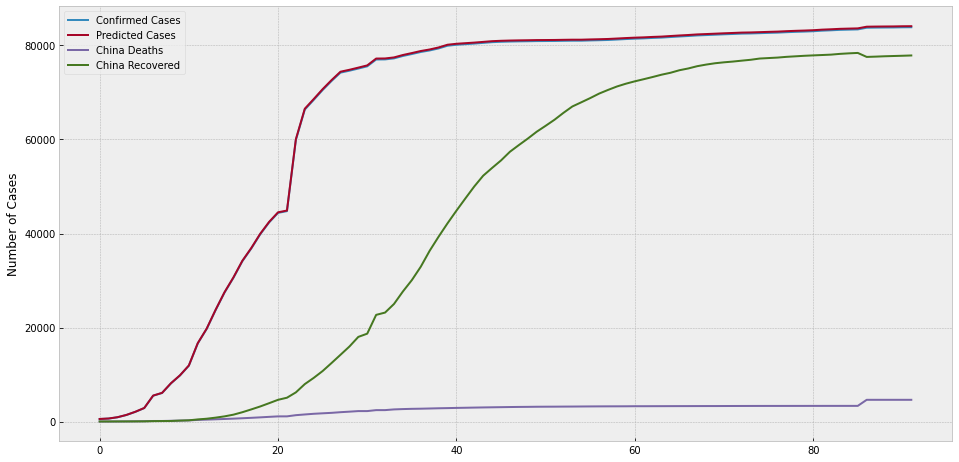

In [906]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['China Confirmed Cases'])
plt.plot(t3['China Predicted Cases'])
plt.plot(t3['China Confirmed Deaths'])
#plt.plot(t3['Predicted Deaths'])
plt.plot(t3['China Recovered'])
#plt.plot(t3['Predicted Recovered'])
plt.legend(['Confirmed Cases', 'Predicted Cases', 'China Deaths', 'China Recovered'], loc='upper left')
plt.show()

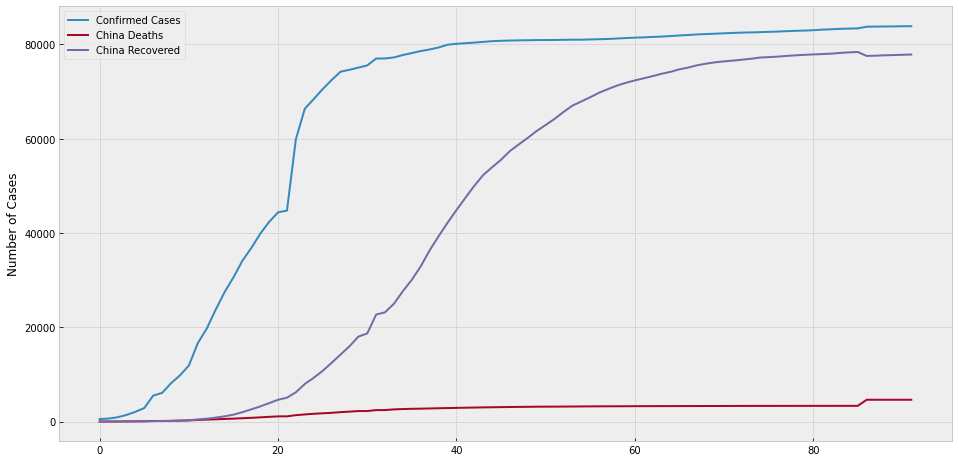

In [907]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['China Confirmed Cases'])
#plt.plot(raw_seq['Predicted Cases'])
plt.plot(t3['China Confirmed Deaths'])#plt.plot(raw_seq['Predicted Deaths'])
plt.plot(t3['China Recovered'])
#plt.plot(raw_seq['Predicted Recovered'])
plt.legend(['Confirmed Cases', 'China Deaths', 'China Recovered'], loc='upper left')
plt.show()

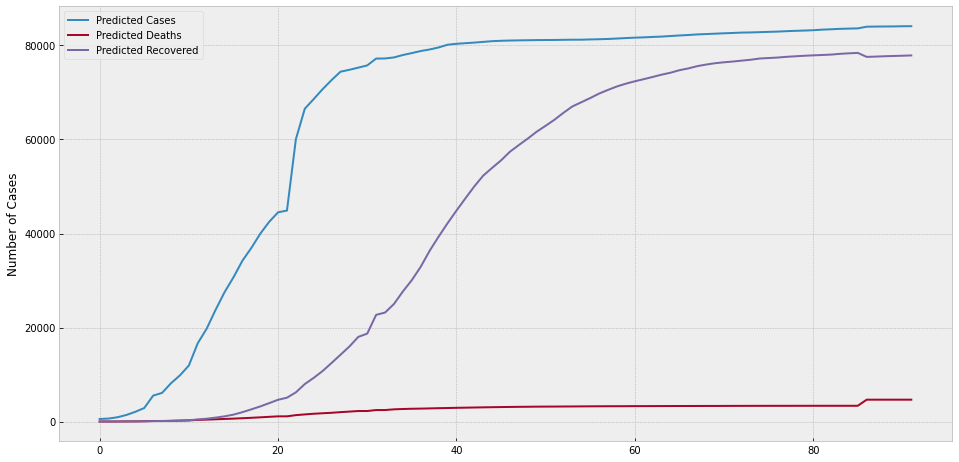

In [908]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
#plt.plot(raw_seq['India Confirmed Cases'])
plt.plot(t3['China Predicted Cases'])
#plt.plot(raw_seq['India Deaths'])
plt.plot(t3['China Predicted Deaths'])
#plt.plot(raw_seq['India Recovered'])
plt.plot(t3['China Predicted Recovered'])
plt.legend(['Predicted Cases', 'Predicted Deaths', 'Predicted Recovered'], loc='upper left')
plt.show()

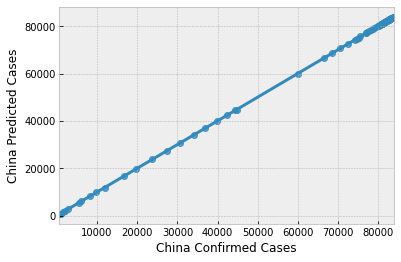

In [909]:
import seaborn as sns
sns.regplot(t3['China Confirmed Cases'], t3['China Predicted Cases'])


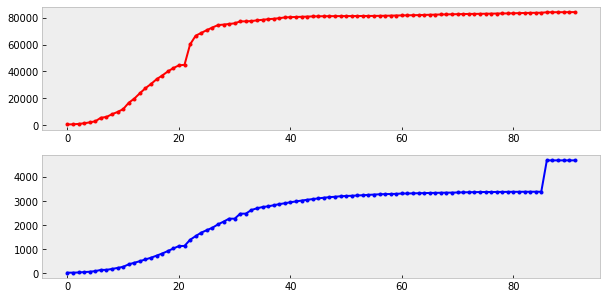

In [910]:
aj = t3['China Predicted Cases']
jk = t3['China Predicted Deaths']
lm = t3['China Predicted Recovered']
lp = t3['China Confirmed Cases']
lt = t3['China Recovered']
lx = t3['China Confirmed Deaths']
fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(211)
line1 = ax1.plot(aj,marker='.',color='red',label="Predicted Cases")
ax2 = fig.add_subplot(212)
line2 = ax2.plot(jk,marker='.',color='blue',label="Predicted Deaths")
ax1.grid()
ax2.grid()
plt.show()

In [911]:
import altair as alt

alt.Chart(t3).mark_point().encode(
    x='Dates',
    y='China Predicted Cases',
    color='China Confirmed Cases',
).interactive()

alt.Chart(...)

In [912]:
import altair as alt

alt.Chart(t3).mark_point().encode(
    x='Dates',
    y='China Predicted Deaths',
    color='China Confirmed Deaths',
).interactive()

alt.Chart(...)

In [913]:
import altair as alt

alt.Chart(t3).mark_point().encode(
    x='Dates',
    y='China Predicted Recovered',
    color='China Recovered',
).interactive()

alt.Chart(...)

In [0]:
import pandas as pd
raw_seq = pd.read_csv("/content/drive/My Drive/wadi/Total_cases_India.csv")

In [0]:
raw_seq = raw_seq.rename(columns={'Confirmed Deaths': 'India Deaths', \
                                  'Confirmed Rcovered': 'India Recovered'})

In [916]:
raw = raw_seq.iloc[4:]

raw.head()

,Dates,India Confirmed Cases,India Deaths,India Recovered
4,01/26/2020,0,0,0
5,01/27/2020,0,0,0
6,01/28/2020,0,0,0
7,01/29/2020,0,0,0
8,01/30/2020,1,0,0


In [0]:
india_confirmed_cases = raw_seq['India Confirmed Cases']
india_deaths = raw_seq['India Deaths']
india_recovered = raw_seq['India Recovered']

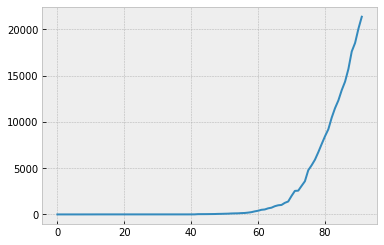

In [918]:
raw_seq['India Confirmed Cases'].plot()

In [919]:
# univariate cnn example
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(india_confirmed_cases, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(india_confirmed_cases)
pred_val = []
for i in range(x):
  i=india_confirmed_cases[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 10ms/step
[[1.6958971]]
1/1 [==============================] - 0s 4ms/step
[[1.6958971]]
1/1 [==============================] - 0s 5ms/step
[[1.6958971]]
1/1 [==============================] - 0s 2ms/step
[[1.6958971]]
1/1 [==============================] - 0s 1ms/step
[[1.6958971]]
1/1 [==============================] - 0s 2ms/step
[[1.6958971]]
1/1 [==============================] - 0s 811us/step
[[1.6958971]]
1/1 [==============================] - 0s 665us/step
[[1.6958971]]
1/1 [==============================] - 0s 1ms/step
[[3.3265347]]
1/1 [==============================] - 0s 1ms/step
[[3.3265347]]
1/1 [==============================] - 0s 740us/step
[[3.3265347]]
1/1 [==============================] - 0s 973us/step
[[4.8588033]]
1/1 [==============================] - 0s 677us/step
[[6.3889165]]
1/1 [==============================] - 0s 1ms/step
[[6.3889165]]
1/1 [==============================] - 0s 664us/step
[[6.3889165]]
1/1 [=======

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['India Predicted Cases']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t1 = raw_seq


In [921]:
print(t1)

         Dates  India Confirmed Cases  ...  India Recovered  India Predicted Cases
0   01/22/2020                      0  ...                0               1.695897
1   01/23/2020                      0  ...                0               1.695897
2   01/24/2020                      0  ...                0               1.695897
3   01/25/2020                      0  ...                0               1.695897
4   01/26/2020                      0  ...                0               1.695897
5   01/27/2020                      0  ...                0               1.695897
6   01/28/2020                      0  ...                0               1.695897
7   01/29/2020                      0  ...                0               1.695897
8   01/30/2020                      1  ...                0               3.326535
9   01/31/2020                      1  ...                0               3.326535
10  02/01/2020                      1  ...                0               3.326535
11  

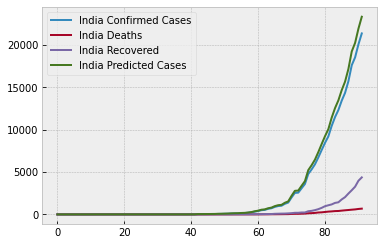

In [922]:
t1.plot()

In [923]:
# India Deaths
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(india_deaths, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(india_deaths)
pred_val = []
for i in range(x):
  i=india_deaths[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 10ms/step
[[1.2070162]]
1/1 [==============================] - 0s 2ms/step
[[1.2070162]]
1/1 [==============================] - 0s 1ms/step
[[1.2070162]]
1/1 [==============================] - 0s 1ms/step
[[1.2070162]]
1/1 [==============================] - 0s 662us/step
[[1.2070162]]
1/1 [==============================] - 0s 751us/step
[[1.2070162]]
1/1 [==============================] - 0s 580us/step
[[1.2070162]]
1/1 [==============================] - 0s 619us/step
[[1.2070162]]
1/1 [==============================] - 0s 760us/step
[[1.2070162]]
1/1 [==============================] - 0s 707us/step
[[1.2070162]]
1/1 [==============================] - 0s 665us/step
[[1.2070162]]
1/1 [==============================] - 0s 672us/step
[[1.2070162]]
1/1 [==============================] - 0s 578us/step
[[1.2070162]]
1/1 [==============================] - 0s 639us/step
[[1.2070162]]
1/1 [==============================] - 0s 774us/step
[[1.2070162]]
1/

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['India Predicted Deaths']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t2 = raw_seq

In [925]:
print(t2)

         Dates  ...  India Predicted Deaths
0   01/22/2020  ...                1.207016
1   01/23/2020  ...                1.207016
2   01/24/2020  ...                1.207016
3   01/25/2020  ...                1.207016
4   01/26/2020  ...                1.207016
5   01/27/2020  ...                1.207016
6   01/28/2020  ...                1.207016
7   01/29/2020  ...                1.207016
8   01/30/2020  ...                1.207016
9   01/31/2020  ...                1.207016
10  02/01/2020  ...                1.207016
11  02/02/2020  ...                1.207016
12  02/03/2020  ...                1.207016
13  02/04/2020  ...                1.207016
14  02/05/2020  ...                1.207016
15  02/06/2020  ...                1.207016
16  02/07/2020  ...                1.207016
17  02/08/2020  ...                1.207016
18  02/09/2020  ...                1.207016
19  02/10/2020  ...                1.207016
20  02/11/2020  ...                1.207016
21  02/12/2020  ...             

In [926]:
t2.tail(10)

,Dates,India Confirmed Cases,India Deaths,India Recovered,India Predicted Cases,India Predicted Deaths
82,04/13/2020,10453,358,1181,11421.760742,397.766998
83,04/14/2020,11487,393,1359,12550.494141,436.134186
84,04/15/2020,12322,405,1432,13461.996094,449.288666
85,04/16/2020,13430,448,1768,14671.505859,496.425507
86,04/17/2020,14352,486,2041,15677.977539,538.081421
87,04/18/2020,15722,521,2463,17173.498047,576.448669
88,04/19/2020,17615,559,2854,19239.927734,618.104370
89,04/20/2020,18539,592,3273,20248.583984,654.279297
90,04/21/2020,20080,645,3975,21930.767578,712.378235
91,04/22/2020,21370,681,4370,23338.953125,751.841736


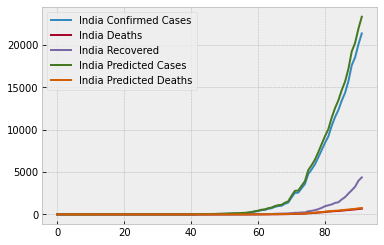

In [927]:
t2.plot()

In [928]:
# India Recovered
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(india_recovered, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(india_recovered)
pred_val = []
for i in range(x):
  i=india_recovered[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 11ms/step
[[1.6380262]]
1/1 [==============================] - 0s 3ms/step
[[1.6380262]]
1/1 [==============================] - 0s 3ms/step
[[1.6380262]]
1/1 [==============================] - 0s 3ms/step
[[1.6380262]]
1/1 [==============================] - 0s 2ms/step
[[1.6380262]]
1/1 [==============================] - 0s 3ms/step
[[1.6380262]]
1/1 [==============================] - 0s 851us/step
[[1.6380262]]
1/1 [==============================] - 0s 2ms/step
[[1.6380262]]
1/1 [==============================] - 0s 2ms/step
[[1.6380262]]
1/1 [==============================] - 0s 474us/step
[[1.6380262]]
1/1 [==============================] - 0s 3ms/step
[[1.6380262]]
1/1 [==============================] - 0s 507us/step
[[1.6380262]]
1/1 [==============================] - 0s 2ms/step
[[1.6380262]]
1/1 [==============================] - 0s 1ms/step
[[1.6380262]]
1/1 [==============================] - 0s 1ms/step
[[1.6380262]]
1/1 [=============

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['India Predicted Recovered']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t31 = raw_seq

In [930]:
print(t31)

         Dates  ...  India Predicted Recovered
0   01/22/2020  ...                   1.638026
1   01/23/2020  ...                   1.638026
2   01/24/2020  ...                   1.638026
3   01/25/2020  ...                   1.638026
4   01/26/2020  ...                   1.638026
5   01/27/2020  ...                   1.638026
6   01/28/2020  ...                   1.638026
7   01/29/2020  ...                   1.638026
8   01/30/2020  ...                   1.638026
9   01/31/2020  ...                   1.638026
10  02/01/2020  ...                   1.638026
11  02/02/2020  ...                   1.638026
12  02/03/2020  ...                   1.638026
13  02/04/2020  ...                   1.638026
14  02/05/2020  ...                   1.638026
15  02/06/2020  ...                   1.638026
16  02/07/2020  ...                   1.638026
17  02/08/2020  ...                   1.638026
18  02/09/2020  ...                   1.638026
19  02/10/2020  ...                   1.638026
20  02/11/202

In [931]:
t31.tail(10)

,Dates,India Confirmed Cases,India Deaths,India Recovered,India Predicted Cases,India Predicted Deaths,India Predicted Recovered
82,04/13/2020,10453,358,1181,11421.760742,397.766998,1478.041382
83,04/14/2020,11487,393,1359,12550.494141,436.134186,1700.033447
84,04/15/2020,12322,405,1432,13461.996094,449.288666,1791.075073
85,04/16/2020,13430,448,1768,14671.505859,496.425507,2210.115967
86,04/17/2020,14352,486,2041,15677.977539,538.081421,2550.586670
87,04/18/2020,15722,521,2463,17173.498047,576.448669,3076.882080
88,04/19/2020,17615,559,2854,19239.927734,618.104370,3564.516357
89,04/20/2020,18539,592,3273,20248.583984,654.279297,4087.070068
90,04/21/2020,20080,645,3975,21930.767578,712.378235,4962.566406
91,04/22/2020,21370,681,4370,23338.953125,751.841736,5455.189453


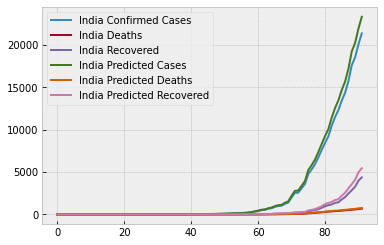

In [932]:
t31.plot()

In [0]:
t31.to_csv (r'/content/drive/My Drive/india_og_preds.csv', index = False, header=True)

In [934]:
'''errors= abs(Total_cases['Prediction'] - raw['India Confirmed Cases'])
mape= np.mean(100*(errors/confirmed_cases))
Accuracy=100-mape
Accuracy'''

"errors= abs(Total_cases['Prediction'] - raw['India Confirmed Cases'])\nmape= np.mean(100*(errors/confirmed_cases))\nAccuracy=100-mape\nAccuracy"

In [935]:
pd.set_option('display.max_rows', t31.shape[0]+1)
print(t31)

         Dates  ...  India Predicted Recovered
0   01/22/2020  ...                   1.638026
1   01/23/2020  ...                   1.638026
2   01/24/2020  ...                   1.638026
3   01/25/2020  ...                   1.638026
4   01/26/2020  ...                   1.638026
5   01/27/2020  ...                   1.638026
6   01/28/2020  ...                   1.638026
7   01/29/2020  ...                   1.638026
8   01/30/2020  ...                   1.638026
9   01/31/2020  ...                   1.638026
10  02/01/2020  ...                   1.638026
11  02/02/2020  ...                   1.638026
12  02/03/2020  ...                   1.638026
13  02/04/2020  ...                   1.638026
14  02/05/2020  ...                   1.638026
15  02/06/2020  ...                   1.638026
16  02/07/2020  ...                   1.638026
17  02/08/2020  ...                   1.638026
18  02/09/2020  ...                   1.638026
19  02/10/2020  ...                   1.638026
20  02/11/202

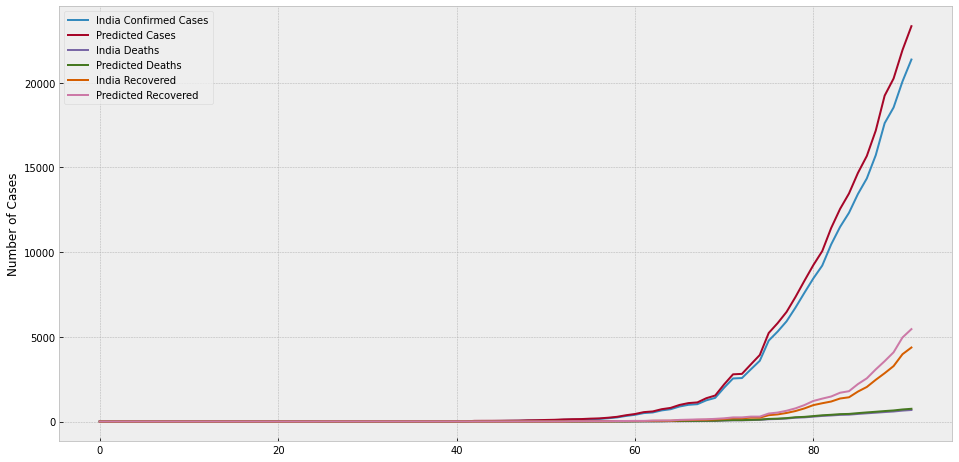

In [936]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t31['India Confirmed Cases'])
plt.plot(t31['India Predicted Cases'])
plt.plot(t31['India Deaths'])
plt.plot(t31['India Predicted Deaths'])
plt.plot(t31['India Recovered'])
plt.plot(t31['India Predicted Recovered'])
plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

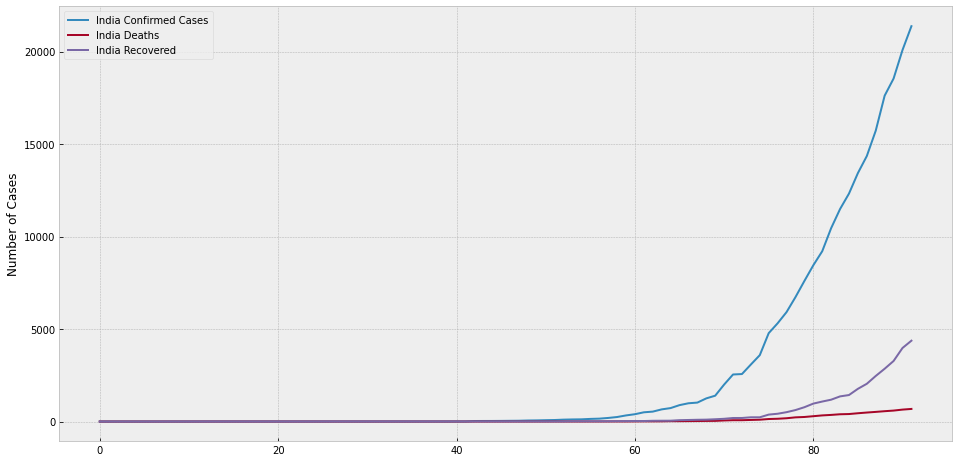

In [937]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t31['India Confirmed Cases'])
#plt.plot(raw_seq['Predicted Cases'])
plt.plot(t31['India Deaths'])#plt.plot(raw_seq['Predicted Deaths'])
plt.plot(t31['India Recovered'])
#plt.plot(raw_seq['Predicted Recovered'])
plt.legend(['India Confirmed Cases', 'India Deaths', 'India Recovered'], loc='upper left')
plt.show()

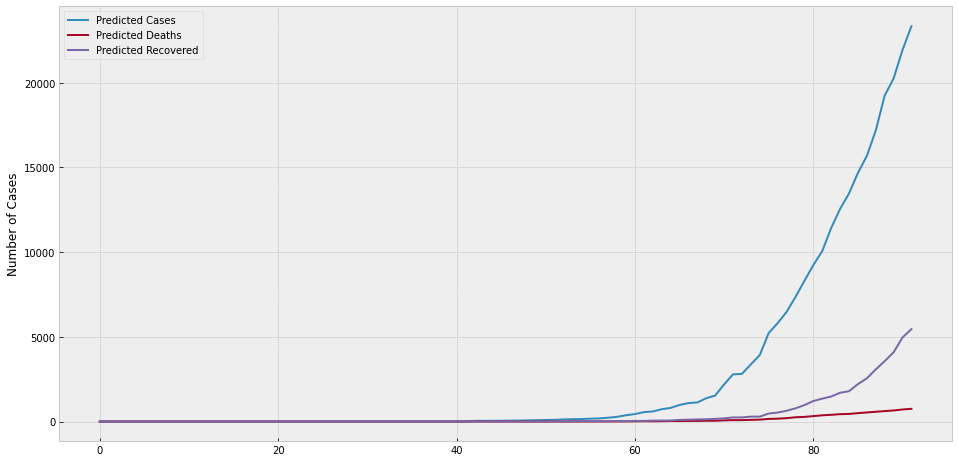

In [938]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
#plt.plot(raw_seq['India Confirmed Cases'])
plt.plot(t31['India Predicted Cases'])
#plt.plot(raw_seq['India Deaths'])
plt.plot(t31['India Predicted Deaths'])
#plt.plot(raw_seq['India Recovered'])
plt.plot(t31['India Predicted Recovered'])
plt.legend(['Predicted Cases', 'Predicted Deaths', 'Predicted Recovered'], loc='upper left')
plt.show()

In [0]:
t41 = t31.pop('Dates')

In [0]:
ab = t3.join(t31)

In [0]:
ab.to_csv("/content/drive/My Drive/totaldata.csv")

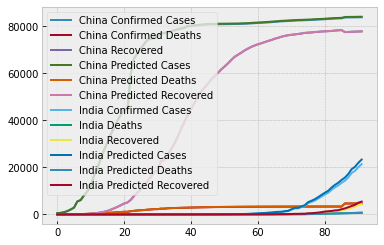

In [942]:
ab.plot()

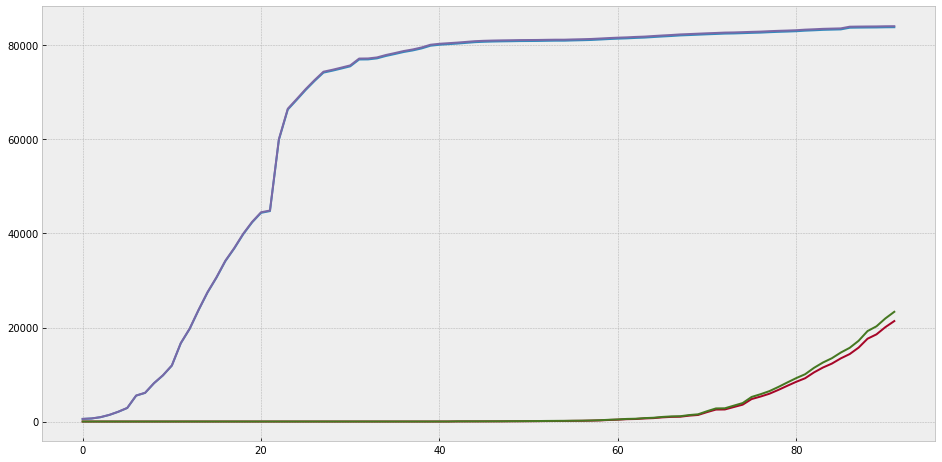

In [943]:
plt.figure(figsize=(16,8))
plt.plot(ab['China Confirmed Cases'])
plt.plot(ab['India Confirmed Cases'])
plt.plot(ab['China Predicted Cases'])
plt.plot(ab['India Predicted Cases'])
plt.show()

In [0]:
newdata = pd.read_csv('/content/drive/My Drive/totaldata.csv', index_col= 'Dates')

In [945]:
newdata

,Unnamed: 0,China Confirmed Cases,China Confirmed Deaths,China Recovered,China Predicted Cases,China Predicted Deaths,China Predicted Recovered,India Confirmed Cases,India Deaths,India Recovered,India Predicted Cases,India Predicted Deaths,India Predicted Recovered
Dates,,,,,,,,,,,,,
01/22/2020,0,548,17,28,564.2025,25.944098,42.669228,0,0,0,1.695897,1.207016,1.638026
01/23/2020,1,643,18,30,659.4339,26.950470,44.669020,0,0,0,1.695897,1.207016,1.638026
01/24/2020,2,920,26,36,937.1091,35.001465,50.668380,0,0,0,1.695897,1.207016,1.638026
01/25/2020,3,1406,42,39,1424.2935,51.103462,53.668060,0,0,0,1.695897,1.207016,1.638026
01/26/2020,4,2075,56,49,2094.9238,65.192700,63.667007,0,0,0,1.695897,1.207016,1.638026
01/27/2020,5,2877,82,58,2898.8787,91.358440,72.666040,0,0,0,1.695897,1.207016,1.638026
01/28/2020,6,5509,131,101,5537.2935,140.670800,115.661500,0,0,0,1.695897,1.207016,1.638026
01/29/2020,7,6087,133,120,6116.7010,142.683560,134.659470,0,0,0,1.695897,1.207016,1.638026
01/30/2020,8,8141,171,135,8175.7070,180.925800,149.657870,1,0,0,3.326535,1.207016,1.638026


In [946]:
newdata.pop('Unnamed: 0')

Dates
01/22/2020     0
01/23/2020     1
01/24/2020     2
01/25/2020     3
01/26/2020     4
01/27/2020     5
01/28/2020     6
01/29/2020     7
01/30/2020     8
01/31/2020     9
02/01/2020    10
02/02/2020    11
02/03/2020    12
02/04/2020    13
02/05/2020    14
02/06/2020    15
02/07/2020    16
02/08/2020    17
02/09/2020    18
02/10/2020    19
02/11/2020    20
02/12/2020    21
02/13/2020    22
02/14/2020    23
02/15/2020    24
02/16/2020    25
02/17/2020    26
02/18/2020    27
02/19/2020    28
02/20/2020    29
02/21/2020    30
02/22/2020    31
02/23/2020    32
02/24/2020    33
02/25/2020    34
02/26/2020    35
02/27/2020    36
02/28/2020    37
02/29/2020    38
03/01/2020    39
03/02/2020    40
03/03/2020    41
03/04/2020    42
03/05/2020    43
03/06/2020    44
03/07/2020    45
03/08/2020    46
03/09/2020    47
03/10/2020    48
03/11/2020    49
03/12/2020    50
03/13/2020    51
03/14/2020    52
03/15/2020    53
03/16/2020    54
03/17/2020    55
03/18/2020    56
03/19/2020    57
03/20/20

In [947]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 01/22/2020 to 04/22/2020
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   China Confirmed Cases      92 non-null     int64  
 1   China Confirmed Deaths     92 non-null     int64  
 2   China Recovered            92 non-null     int64  
 3   China Predicted Cases      92 non-null     float64
 4   China Predicted Deaths     92 non-null     float64
 5   China Predicted Recovered  92 non-null     float64
 6   India Confirmed Cases      92 non-null     int64  
 7   India Deaths               92 non-null     int64  
 8   India Recovered            92 non-null     int64  
 9   India Predicted Cases      92 non-null     float64
 10  India Predicted Deaths     92 non-null     float64
 11  India Predicted Recovered  92 non-null     float64
dtypes: float64(6), int64(6)
memory usage: 11.8+ KB


In [0]:
newdata.to_csv("/content/drive/My Drive/china_indiacombined.csv")

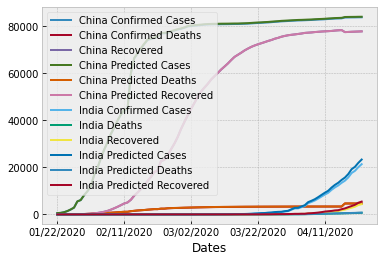

In [949]:
newdata.plot()

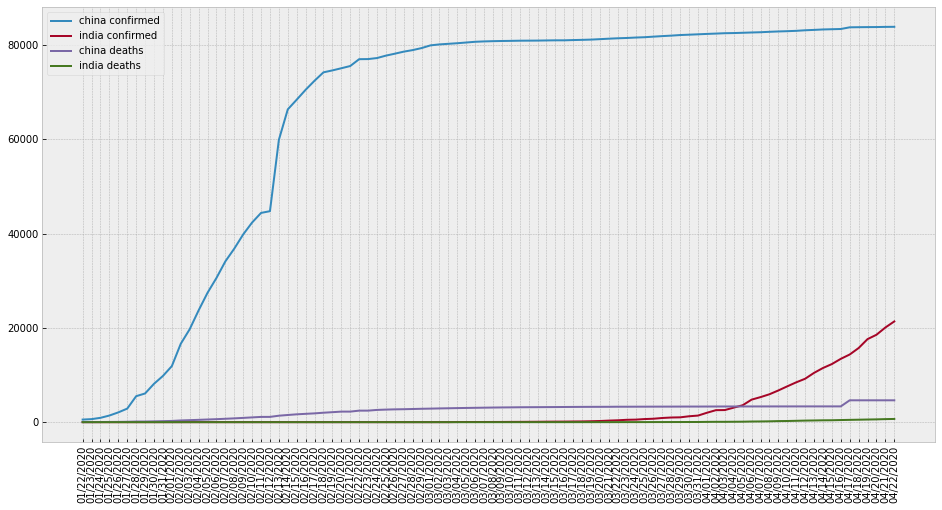

In [950]:
plt.figure(figsize=(16,8))
plt.plot(newdata['China Confirmed Cases'])
plt.plot(newdata['India Confirmed Cases'])
plt.plot(newdata['China Confirmed Deaths'])
plt.plot(newdata['India Deaths'])
plt.xticks(rotation=90)
plt.legend(['china confirmed','india confirmed','china deaths','india deaths'])
plt.show()

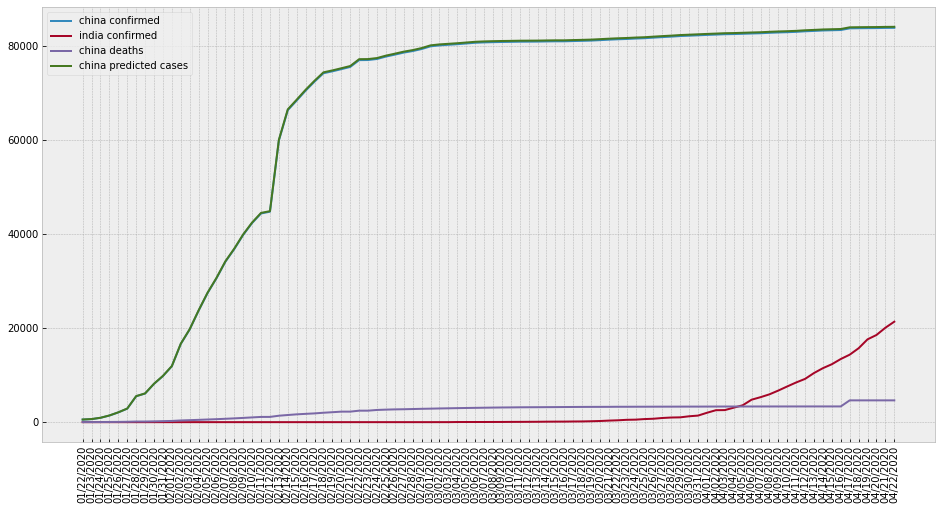

In [951]:
plt.figure(figsize=(16,8))
plt.plot(newdata['China Confirmed Cases'])
plt.plot(newdata['India Confirmed Cases'])
plt.plot(newdata['China Confirmed Deaths'])
plt.plot(newdata['China Predicted Cases'])
plt.xticks(rotation=90)
plt.legend(['china confirmed','india confirmed','china deaths','china predicted cases'])
plt.show()

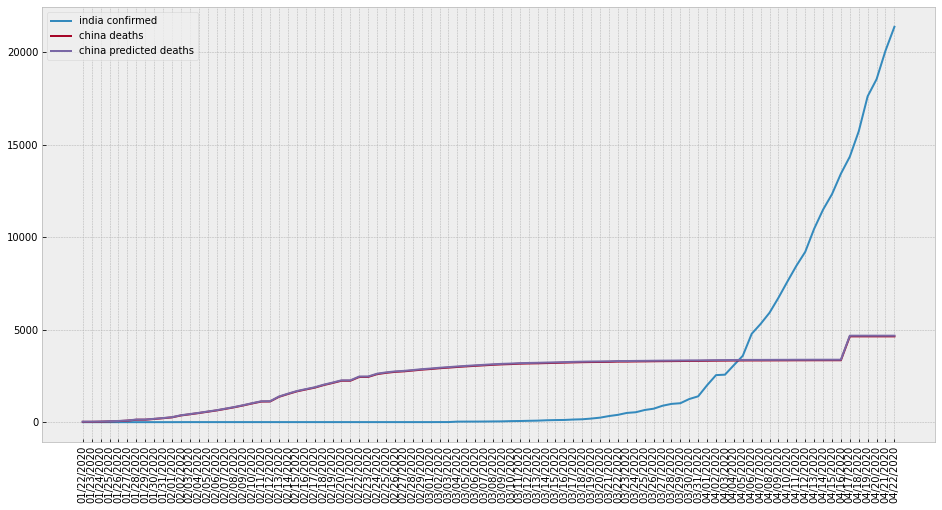

In [952]:
plt.figure(figsize=(16,8))
plt.plot(newdata['India Confirmed Cases'])
plt.plot(newdata['China Confirmed Deaths'])
plt.plot(newdata['China Predicted Deaths'])
plt.xticks(rotation=90)
plt.legend(['india confirmed','china deaths','china predicted deaths'])
plt.show()

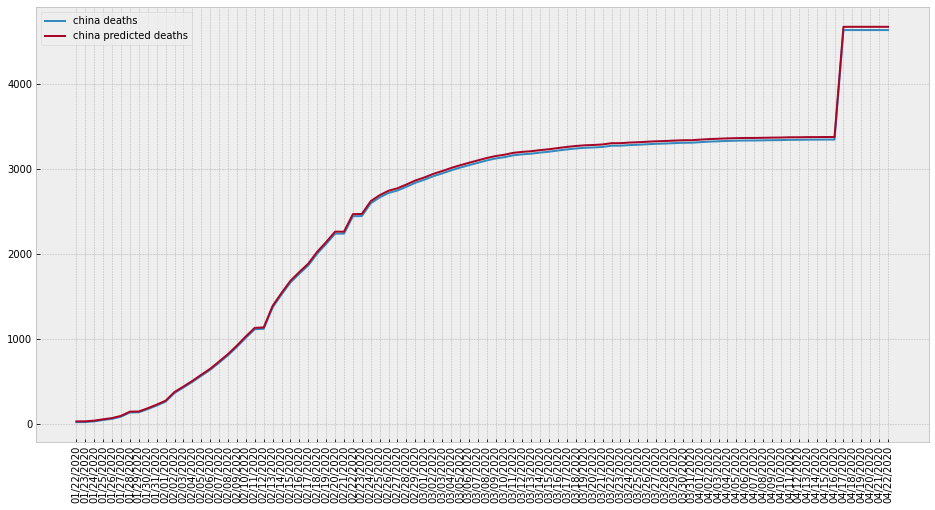

In [953]:
plt.figure(figsize=(16,8))
plt.plot(newdata['China Confirmed Deaths'])
plt.plot(newdata['China Predicted Deaths'])
plt.xticks(rotation=90)
plt.legend(['china deaths','china predicted deaths'])
plt.show()

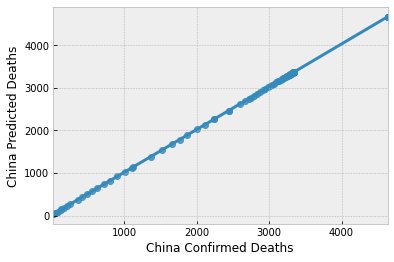

In [954]:
import seaborn as sns
sns.regplot(newdata['China Confirmed Deaths'],newdata['China Predicted Deaths'])


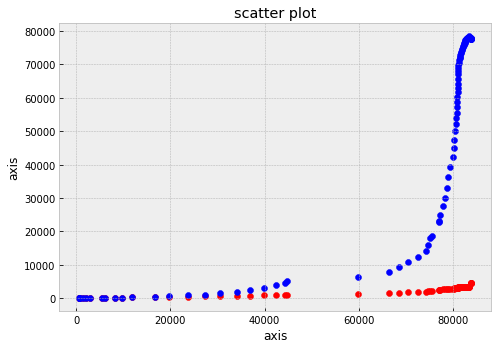

In [955]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(newdata['China Confirmed Cases'], newdata['China Confirmed Deaths'], color='r')
ax.scatter(newdata['China Confirmed Cases'], newdata['China Recovered'], color='b')
ax.set_xlabel('axis')
ax.set_ylabel('axis')
ax.set_title('scatter plot')
plt.show()

Text(0.5, 1.0, 'China confirmed cases vs China death cases')

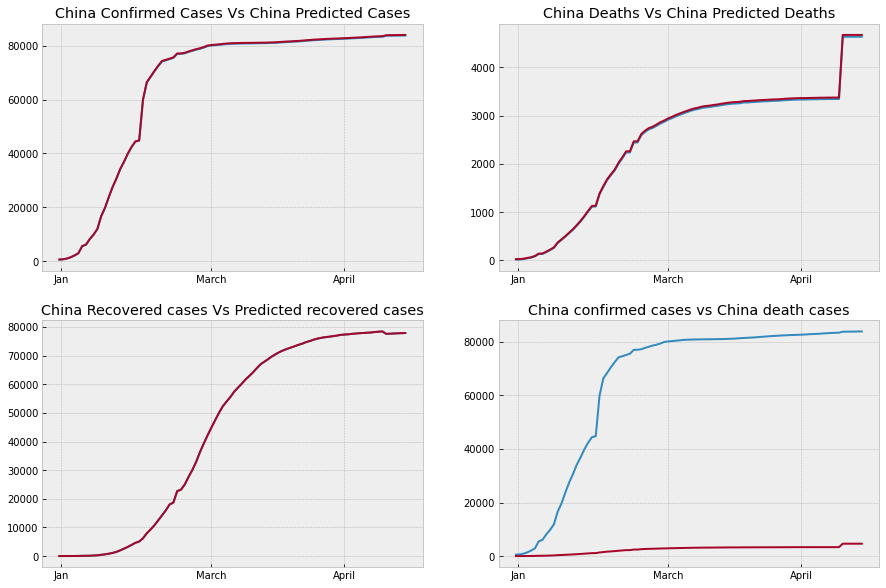

In [956]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0.5, 40, 75], xticklabels=['Jan', 'March', 'April'])

a[0][0].plot(newdata['China Confirmed Cases']) 
a[0][0].plot(newdata['China Predicted Cases'])
a[0][0].set_title('China Confirmed Cases Vs China Predicted Cases')
a[0][1].plot(newdata['China Confirmed Deaths'])
a[0][1].plot(newdata['China Predicted Deaths'])
a[0][1].set_title('China Deaths Vs China Predicted Deaths')
a[1][0].plot(newdata['China Recovered'])
a[1][0].plot(newdata['China Predicted Recovered'])
a[1][0].set_title('China Recovered cases Vs Predicted recovered cases')
a[1][1].plot(newdata['China Confirmed Cases'])
a[1][1].plot(newdata['China Confirmed Deaths'])
a[1][1].set_title('China confirmed cases vs China death cases')

#plt.savefig('/content/drive/My Drive/chinagrid_cnn.png', dpi=1200)


'for a in a.flat:\n  a.set_xticks(newdata.values)'

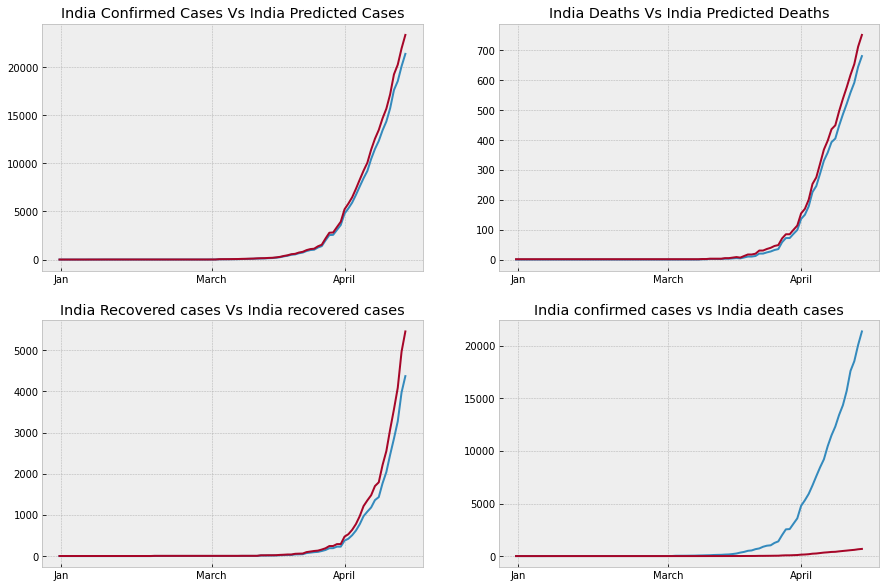

In [957]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
plt.setp(a, xticks=[0.5, 40, 75], xticklabels=['Jan', 'March', 'April'])


a[0][0].plot(newdata['India Confirmed Cases']) 
a[0][0].plot(newdata['India Predicted Cases'])
a[0][0].set_title('India Confirmed Cases Vs India Predicted Cases')
a[0][1].plot(newdata['India Deaths'])
a[0][1].plot(newdata['India Predicted Deaths'])
a[0][1].set_title('India Deaths Vs India Predicted Deaths')
a[1][0].plot(newdata['India Recovered'])
a[1][0].plot(newdata['India Predicted Recovered'])
a[1][0].set_title('India Recovered cases Vs India recovered cases')
a[1][1].plot(newdata['India Confirmed Cases'])
a[1][1].plot(newdata['India Deaths'])
a[1][1].set_title('India confirmed cases vs India death cases')
#plt.savefig('/content/drive/My Drive/indiagrid_cnn.png', dpi=1200)



'''for a in a.flat:
  a.set_xticks(newdata.values)'''

**COMPARSION OF CHINA AND INDIA WITH DECISION TREE REGRESSOR - PREDICTION THEORY 2**


In [958]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [0]:
#from google.colab import files
#uploaded = files.upload()


In [960]:
df = pd.read_csv('/content/drive/My Drive/Total_cases_China (1).csv', index_col = 'Dates')
df.tail(19)

,China Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
04/04/2020,82543,3330,76946
04/05/2020,82602,3333,77207
04/06/2020,82665,3335,77310
04/07/2020,82718,3335,77410
04/08/2020,82809,3337,77567
04/09/2020,82883,3339,77679
04/10/2020,82941,3340,77791
04/11/2020,83014,3343,77877
04/12/2020,83134,3343,77956


In [961]:
df.shape

(92, 3)

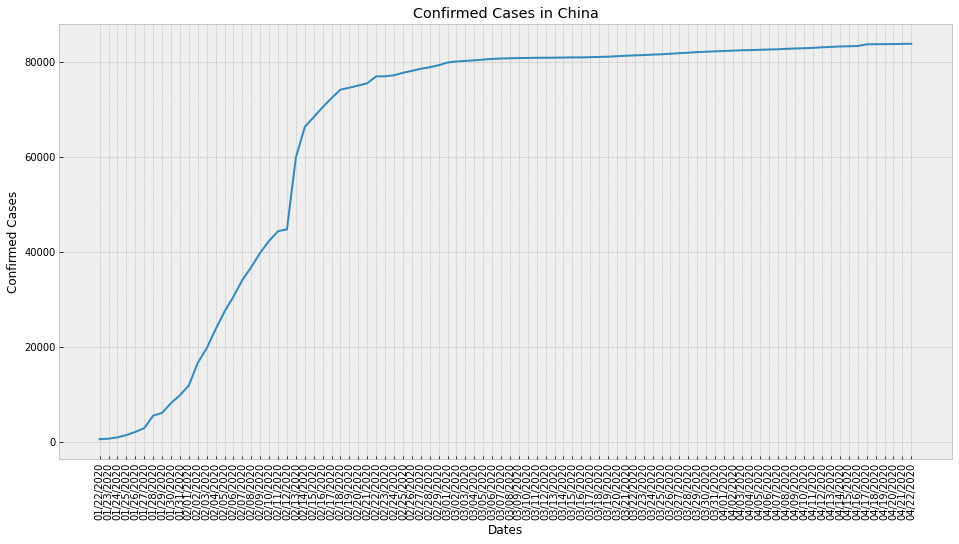

In [962]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases in China')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(df['China Confirmed Cases'])
plt.xticks(rotation=90)
plt.show()

In [963]:
df = df[['China Confirmed Cases']]
df.head(4)

,China Confirmed Cases
Dates,
01/22/2020,548
01/23/2020,643
01/24/2020,920
01/25/2020,1406


In [964]:
future_days = 25
df['Predicted Cases'] = df[['China Confirmed Cases']].shift(-future_days)
df.head(4)

,China Confirmed Cases,Predicted Cases
Dates,,
01/22/2020,548,70513.0
01/23/2020,643,72434.0
01/24/2020,920,74211.0
01/25/2020,1406,74619.0


In [965]:
df.tail(20)

,China Confirmed Cases,Predicted Cases
Dates,,
04/03/2020,82511,NaN
04/04/2020,82543,NaN
04/05/2020,82602,NaN
04/06/2020,82665,NaN
04/07/2020,82718,NaN
04/08/2020,82809,NaN
04/09/2020,82883,NaN
04/10/2020,82941,NaN
04/11/2020,83014,NaN


In [966]:
X = np.array(df.drop(['Predicted Cases'], 1))[:-future_days]
print(X)

[[  548]
 [  643]
 [  920]
 [ 1406]
 [ 2075]
 [ 2877]
 [ 5509]
 [ 6087]
 [ 8141]
 [ 9802]
 [11891]
 [16630]
 [19716]
 [23707]
 [27440]
 [30587]
 [34110]
 [36814]
 [39829]
 [42354]
 [44386]
 [44759]
 [59895]
 [66358]
 [68413]
 [70513]
 [72434]
 [74211]
 [74619]
 [75077]
 [75550]
 [77001]
 [77022]
 [77241]
 [77754]
 [78166]
 [78600]
 [78928]
 [79356]
 [79932]
 [80136]
 [80261]
 [80386]
 [80537]
 [80690]
 [80770]
 [80823]
 [80860]
 [80887]
 [80921]
 [80932]
 [80945]
 [80977]
 [81003]
 [81003]
 [81058]
 [81102]
 [81156]
 [81250]
 [81350]
 [81435]
 [81498]
 [81591]
 [81661]
 [81782]
 [81897]
 [81999]]


In [967]:
y = np.array(df['Predicted Cases'])[:-future_days]
print(y)

[70513. 72434. 74211. 74619. 75077. 75550. 77001. 77022. 77241. 77754.
 78166. 78600. 78928. 79356. 79932. 80136. 80261. 80386. 80537. 80690.
 80770. 80823. 80860. 80887. 80921. 80932. 80945. 80977. 81003. 81003.
 81058. 81102. 81156. 81250. 81350. 81435. 81498. 81591. 81661. 81782.
 81897. 81999. 82122. 82198. 82279. 82361. 82432. 82511. 82543. 82602.
 82665. 82718. 82809. 82883. 82941. 83014. 83134. 83213. 83306. 83356.
 83403. 83760. 83787. 83805. 83817. 83853. 83868.]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [0]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [970]:
x_future = df.drop(['Predicted Cases'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[80386],
       [80537],
       [80690],
       [80770],
       [80823],
       [80860],
       [80887],
       [80921],
       [80932],
       [80945],
       [80977],
       [81003],
       [81003],
       [81058],
       [81102],
       [81156],
       [81250],
       [81350],
       [81435],
       [81498],
       [81591],
       [81661],
       [81782],
       [81897],
       [81999]])

In [971]:
tree_predictions = tree.predict(x_future)
print(tree_predictions)
print()
lr_predictions = lr.predict(x_future)
print(lr_predictions)

[82122. 82198. 82279. 82432. 82432. 82432. 82602. 82602. 82665. 82665.
 82809. 82912. 82912. 83014. 83134. 83213. 83306. 83356. 83760. 83760.
 83787. 83805. 83817. 83853. 83868.]

[82599.80594122 82611.01218225 82622.36685031 82628.30393164
 82632.23724803 82634.98314815 82636.9869131  82639.51017267
 82640.32652135 82641.29129707 82643.6661296  82645.59568104
 82645.59568104 82649.67742446 82652.94281919 82656.9503491
 82663.92641967 82671.34777134 82677.65592026 82682.33137182
 82689.23322887 82694.42817504 82703.40801056 82711.94256499
 82719.51234369]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


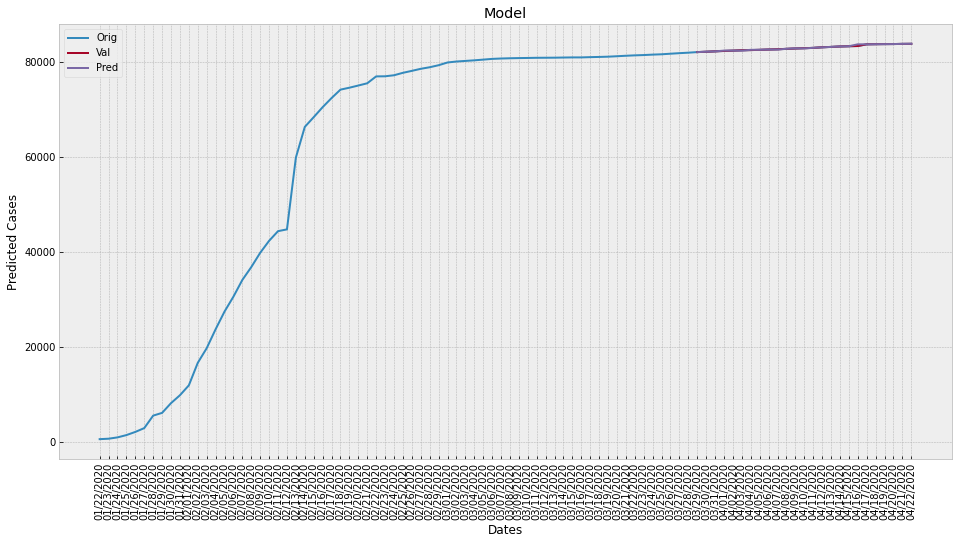

In [972]:
predictions = tree_predictions

valid = df[X.shape[0]:]
valid['Predicted Cases'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df['China Confirmed Cases'])
plt.plot(valid['China Confirmed Cases'])
plt.plot(valid['Predicted Cases'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [973]:
valid

,China Confirmed Cases,Predicted Cases
Dates,,
03/29/2020,82122,82122.0
03/30/2020,82198,82198.0
03/31/2020,82279,82279.0
04/01/2020,82361,82432.0
04/02/2020,82432,82432.0
04/03/2020,82511,82432.0
04/04/2020,82543,82602.0
04/05/2020,82602,82602.0
04/06/2020,82665,82665.0


In [974]:
from sklearn.metrics import r2_score
score = r2_score(valid['China Confirmed Cases'], valid['Predicted Cases'])
print(score)

0.9815483939129811


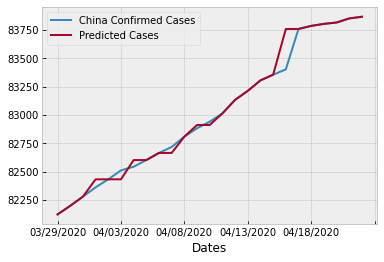

In [975]:
valid.plot()

In [976]:
df2= pd.read_csv('/content/drive/My Drive/Total_cases_China (1).csv', index_col = 'Dates')
df2.head(10)

,China Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
01/22/2020,548,17,28
01/23/2020,643,18,30
01/24/2020,920,26,36
01/25/2020,1406,42,39
01/26/2020,2075,56,49
01/27/2020,2877,82,58
01/28/2020,5509,131,101
01/29/2020,6087,133,120
01/30/2020,8141,171,135


In [0]:
df2 = df2[['Confirmed Deaths']]

In [978]:
df2.head()

,Confirmed Deaths
Dates,
01/22/2020,17
01/23/2020,18
01/24/2020,26
01/25/2020,42
01/26/2020,56


In [979]:
future_days_deaths = 25
df2['Predicted Deaths'] = df2[['Confirmed Deaths']].shift(-future_days_deaths)
df2.tail(4)

,Confirmed Deaths,Predicted Deaths
Dates,,
04/19/2020,4636,NaN
04/20/2020,4636,NaN
04/21/2020,4636,NaN
04/22/2020,4636,NaN


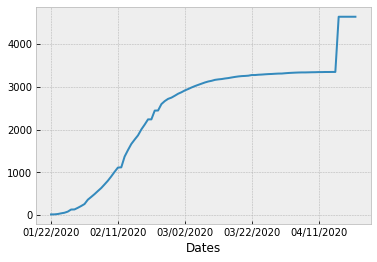

In [980]:
df2['Confirmed Deaths'].plot()

In [981]:
X1 = np.array(df2.drop(['Predicted Deaths'], 1))[:-future_days_deaths]
print(X1)

[[  17]
 [  18]
 [  26]
 [  42]
 [  56]
 [  82]
 [ 131]
 [ 133]
 [ 171]
 [ 213]
 [ 259]
 [ 361]
 [ 425]
 [ 491]
 [ 563]
 [ 633]
 [ 718]
 [ 805]
 [ 905]
 [1012]
 [1112]
 [1117]
 [1369]
 [1521]
 [1663]
 [1766]
 [1864]
 [2003]
 [2116]
 [2238]
 [2238]
 [2443]
 [2445]
 [2595]
 [2665]
 [2717]
 [2746]
 [2790]
 [2837]
 [2872]
 [2914]
 [2947]
 [2983]
 [3015]
 [3044]
 [3072]
 [3100]
 [3123]
 [3139]
 [3161]
 [3172]
 [3180]
 [3193]
 [3203]
 [3217]
 [3230]
 [3241]
 [3249]
 [3253]
 [3259]
 [3274]
 [3274]
 [3281]
 [3285]
 [3291]
 [3296]
 [3299]]


In [982]:
y1 = np.array(df2['Predicted Deaths'])[:-future_days_deaths]
print(y1)

[1766. 1864. 2003. 2116. 2238. 2238. 2443. 2445. 2595. 2665. 2717. 2746.
 2790. 2837. 2872. 2914. 2947. 2983. 3015. 3044. 3072. 3100. 3123. 3139.
 3161. 3172. 3180. 3193. 3203. 3217. 3230. 3241. 3249. 3253. 3259. 3274.
 3274. 3281. 3285. 3291. 3296. 3299. 3304. 3308. 3309. 3316. 3322. 3326.
 3330. 3333. 3335. 3335. 3337. 3339. 3340. 3343. 3343. 3345. 3345. 3346.
 3346. 4636. 4636. 4636. 4636. 4636. 4636.]


In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.25)


In [0]:
tree2 = DecisionTreeRegressor().fit(x_train2, y_train2)
lr2 = LinearRegression().fit(x_train2, y_train2)

In [985]:
x_future2 = df2.drop(['Predicted Deaths'], 1)[:-future_days_deaths]
x_future2 = x_future2.tail(future_days_deaths)
x_future2 = np.array(x_future2)
x_future2

array([[2983],
       [3015],
       [3044],
       [3072],
       [3100],
       [3123],
       [3139],
       [3161],
       [3172],
       [3180],
       [3193],
       [3203],
       [3217],
       [3230],
       [3241],
       [3249],
       [3253],
       [3259],
       [3274],
       [3274],
       [3281],
       [3285],
       [3291],
       [3296],
       [3299]])

In [986]:
tree_predictions2 = tree2.predict(x_future2)
print(tree_predictions2)
print()
lr_predictions2 = lr2.predict(x_future2)
print(lr_predictions2)

[3304. 3309. 3309. 3316. 3322. 3326. 3330. 3333. 3335. 3335. 3337. 3339.
 3340. 3343. 3343. 3343. 3346. 3346. 3991. 3991. 4636. 4636. 4636. 4636.
 4636.]

[3558.7248205  3570.97620075 3582.0790141  3592.79897182 3603.51892954
 3612.3246091  3618.45029922 3626.87312314 3631.0845351  3634.14738017
 3639.12450339 3642.95305972 3648.31303858 3653.2901618  3657.50157377
 3660.56441883 3662.09584136 3664.39297516 3670.13580965 3670.13580965
 3672.81579908 3674.34722161 3676.64435541 3678.55863357 3679.70720047]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


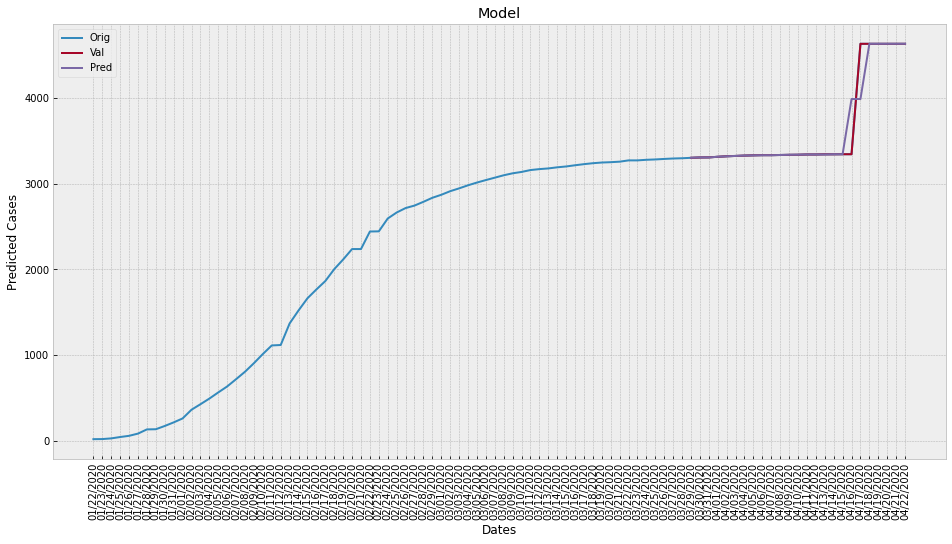

In [987]:
predictions2 = tree_predictions2

valid2 = df2[X1.shape[0]:]
valid2['Predicted Deaths'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df2['Confirmed Deaths'])
plt.plot(valid2['Confirmed Deaths'])
plt.plot(valid2['Predicted Deaths'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [988]:
from sklearn.metrics import r2_score
score2 = r2_score(valid2['Confirmed Deaths'], valid2['Predicted Deaths'])
print(score2)

0.8927910028183451


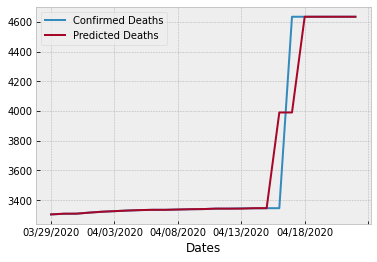

In [989]:
valid2.plot()

In [990]:
df3 = pd.read_csv("/content/drive/My Drive/Total_cases_China (1).csv", index_col = 'Dates')
df3.head(5)

,China Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
01/22/2020,548,17,28
01/23/2020,643,18,30
01/24/2020,920,26,36
01/25/2020,1406,42,39
01/26/2020,2075,56,49


In [0]:
df3 = df3[['Confirmed Recovered']]

In [992]:
df3.head()

,Confirmed Recovered
Dates,
01/22/2020,28
01/23/2020,30
01/24/2020,36
01/25/2020,39
01/26/2020,49


In [0]:
future_days_recover = 25

In [994]:
df3['Predicted Recovered'] = df3[['Confirmed Recovered']].shift(-future_days_recover)
df3.tail(4)

,Confirmed Recovered,Predicted Recovered
Dates,,
04/19/2020,77690,NaN
04/20/2020,77745,NaN
04/21/2020,77799,NaN
04/22/2020,77861,NaN


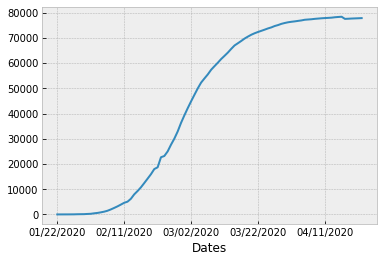

In [995]:
df3['Confirmed Recovered'].plot()

In [996]:
X2 = np.array(df3.drop(['Predicted Recovered'], 1))[:-future_days_recover]
print(X2)

[[   28]
 [   30]
 [   36]
 [   39]
 [   49]
 [   58]
 [  101]
 [  120]
 [  135]
 [  214]
 [  275]
 [  463]
 [  614]
 [  843]
 [ 1115]
 [ 1477]
 [ 1999]
 [ 2596]
 [ 3219]
 [ 3918]
 [ 4636]
 [ 5082]
 [ 6217]
 [ 7977]
 [ 9298]
 [10755]
 [12462]
 [14206]
 [15962]
 [18014]
 [18704]
 [22699]
 [23187]
 [25015]
 [27676]
 [30084]
 [32930]
 [36329]
 [39320]
 [42162]
 [44854]
 [47450]
 [50001]
 [52292]
 [53944]
 [55539]
 [57388]
 [58804]
 [60181]
 [61644]
 [62901]
 [64196]
 [65660]
 [67017]
 [67901]
 [68798]
 [69755]
 [70535]
 [71266]
 [71857]
 [72362]
 [72814]
 [73280]
 [73773]
 [74181]
 [74720]
 [75100]]


In [997]:
y2 = np.array(df3['Predicted Recovered'])[:-future_days_recover]
print(y2)

[10755. 12462. 14206. 15962. 18014. 18704. 22699. 23187. 25015. 27676.
 30084. 32930. 36329. 39320. 42162. 44854. 47450. 50001. 52292. 53944.
 55539. 57388. 58804. 60181. 61644. 62901. 64196. 65660. 67017. 67901.
 68798. 69755. 70535. 71266. 71857. 72362. 72814. 73280. 73773. 74181.
 74720. 75100. 75582. 75923. 76206. 76405. 76565. 76760. 76946. 77207.
 77310. 77410. 77567. 77679. 77791. 77877. 77956. 78039. 78200. 78311.
 78401. 77552. 77614. 77690. 77745. 77799. 77861.]


In [0]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.25)


In [0]:
tree3 = DecisionTreeRegressor().fit(x_train3, y_train3)
lr3 = LinearRegression().fit(x_train3, y_train3)

In [1000]:
x_future3 = df3.drop(['Predicted Recovered'], 1)[:-future_days_recover]
x_future3 = x_future3.tail(future_days_recover)
x_future3 = np.array(x_future3)
x_future3

array([[50001],
       [52292],
       [53944],
       [55539],
       [57388],
       [58804],
       [60181],
       [61644],
       [62901],
       [64196],
       [65660],
       [67017],
       [67901],
       [68798],
       [69755],
       [70535],
       [71266],
       [71857],
       [72362],
       [72814],
       [73280],
       [73773],
       [74181],
       [74720],
       [75100]])

In [1001]:
tree_predictions3 = tree3.predict(x_future3)
print(tree_predictions3)
print()
lr_predictions3 = lr3.predict(x_future3)
print(lr_predictions3)

[75923. 75923. 76206. 76405. 76565. 76760. 76760. 77207. 77310. 77410.
 77567. 77679. 77791. 77791. 77956. 78039. 78200. 78401. 78401. 78401.
 77614. 77690. 77690. 77799. 77799.]

[71412.66259002 72855.25277033 73895.47929929 74899.81423494
 76064.08714781 76955.70988692 77822.77522008 78743.99278175
 79535.49686584 80350.9286788  81272.77591754 82127.24770919
 82683.88224406 83248.70258091 83851.30354231 84342.45166131
 84802.7456036  85174.88475531 85492.87167851 85777.4857167
 86070.91523395 86381.34603225 86638.25427911 86977.65022288
 87216.92751163]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


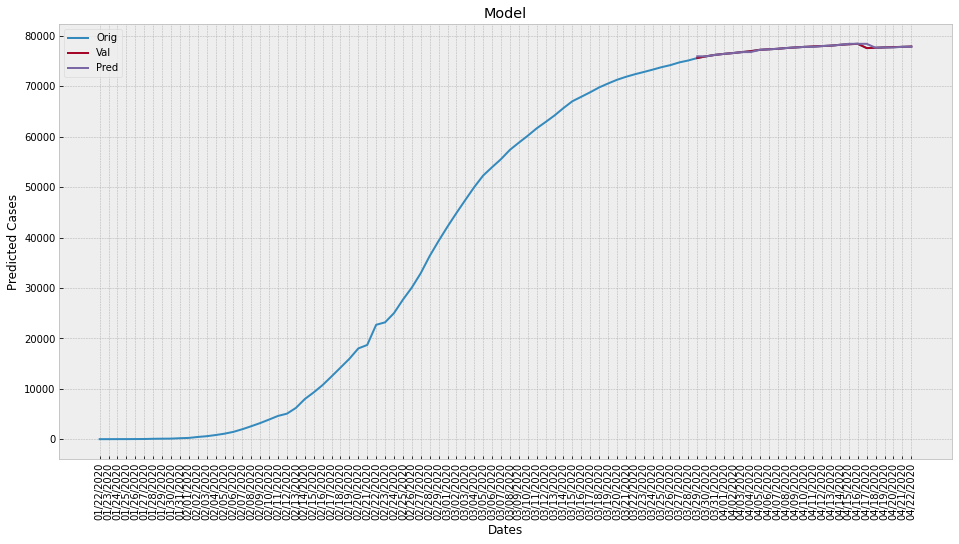

In [1002]:
predictions3 = tree_predictions3

valid3 = df3[X2.shape[0]:]
valid3['Predicted Recovered'] = predictions3

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df3['Confirmed Recovered'])
plt.plot(valid3['Confirmed Recovered'])
plt.plot(valid3['Predicted Recovered'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [1003]:
valid3

,Confirmed Recovered,Predicted Recovered
Dates,,
03/29/2020,75582,75923.0
03/30/2020,75923,75923.0
03/31/2020,76206,76206.0
04/01/2020,76405,76405.0
04/02/2020,76565,76565.0
04/03/2020,76760,76760.0
04/04/2020,76946,76760.0
04/05/2020,77207,77207.0
04/06/2020,77310,77310.0


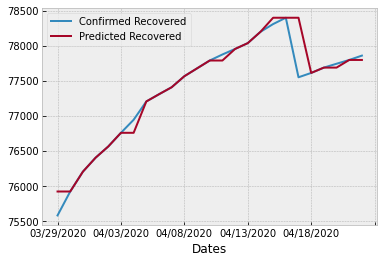

In [1004]:
valid3.plot()

In [1005]:
valid_final = valid.join(valid2.join(valid3))
valid_final

,China Confirmed Cases,Predicted Cases,Confirmed Deaths,Predicted Deaths,Confirmed Recovered,Predicted Recovered
Dates,,,,,,
03/29/2020,82122,82122.0,3304,3304.0,75582,75923.0
03/30/2020,82198,82198.0,3308,3309.0,75923,75923.0
03/31/2020,82279,82279.0,3309,3309.0,76206,76206.0
04/01/2020,82361,82432.0,3316,3316.0,76405,76405.0
04/02/2020,82432,82432.0,3322,3322.0,76565,76565.0
04/03/2020,82511,82432.0,3326,3326.0,76760,76760.0
04/04/2020,82543,82602.0,3330,3330.0,76946,76760.0
04/05/2020,82602,82602.0,3333,3333.0,77207,77207.0
04/06/2020,82665,82665.0,3335,3335.0,77310,77310.0


In [1006]:
from sklearn.metrics import r2_score
score3 = r2_score(valid3['Confirmed Recovered'], valid3['Predicted Recovered'])
print(score3)

0.9340937611779051


In [1007]:
average = (score + score2 + score3) / 3
average

0.9361443859697438

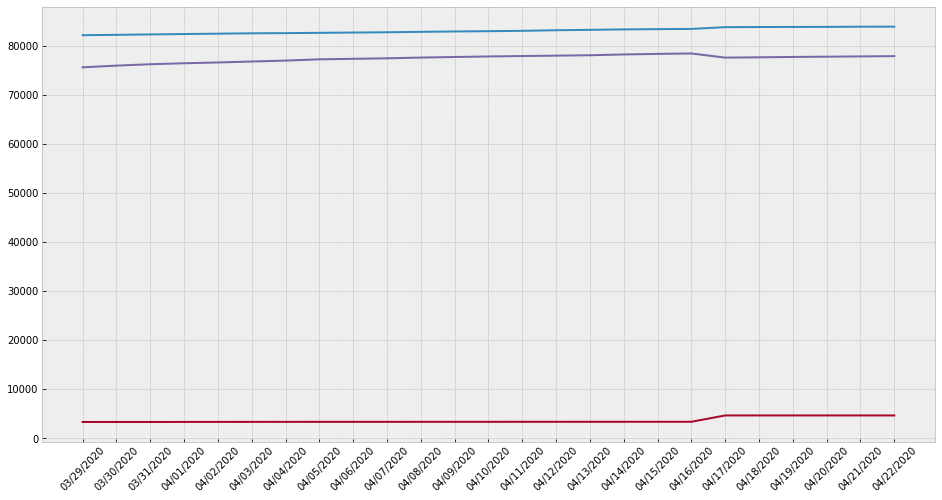

In [1008]:
plt.figure(figsize=(16,8))
plt.plot(valid_final['China Confirmed Cases'])
plt.plot(valid_final['Confirmed Deaths'])
plt.plot(valid_final['Confirmed Recovered'])
plt.xticks(rotation=45)
#plt.legend('Cases', 'Deaths', 'Recovered')
plt.show()

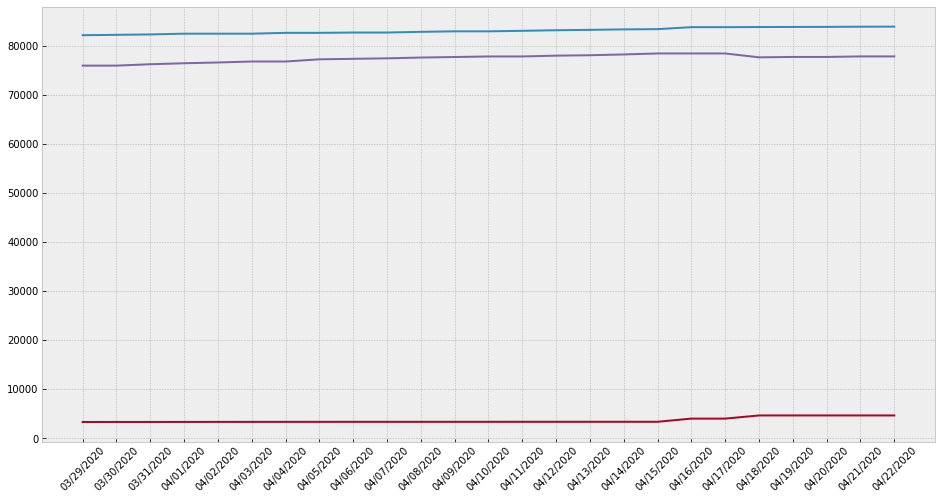

In [1009]:
plt.figure(figsize=(16,8))
plt.plot(valid_final['Predicted Cases'])
plt.plot(valid_final['Predicted Deaths'])
plt.plot(valid_final['Predicted Recovered'])
plt.xticks(rotation=45)
plt.show()

In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [1011]:
df = pd.read_csv('/content/drive/My Drive/Total_cases_India.csv', index_col = 'Dates')
#df = df.iloc[:79]
df = df.rename(columns={"Confirmed Rcovered": "India Confirmed Recovered", \
                        "Confirmed Deaths": "India Confirmed Deaths"})
df.tail(19)


,India Confirmed Cases,India Confirmed Deaths,India Confirmed Recovered
Dates,,,
04/04/2020,3082,86,229
04/05/2020,3588,99,229
04/06/2020,4778,136,375
04/07/2020,5311,150,421
04/08/2020,5916,178,506
04/09/2020,6725,226,620
04/10/2020,7598,246,774
04/11/2020,8446,288,969
04/12/2020,9205,331,1080


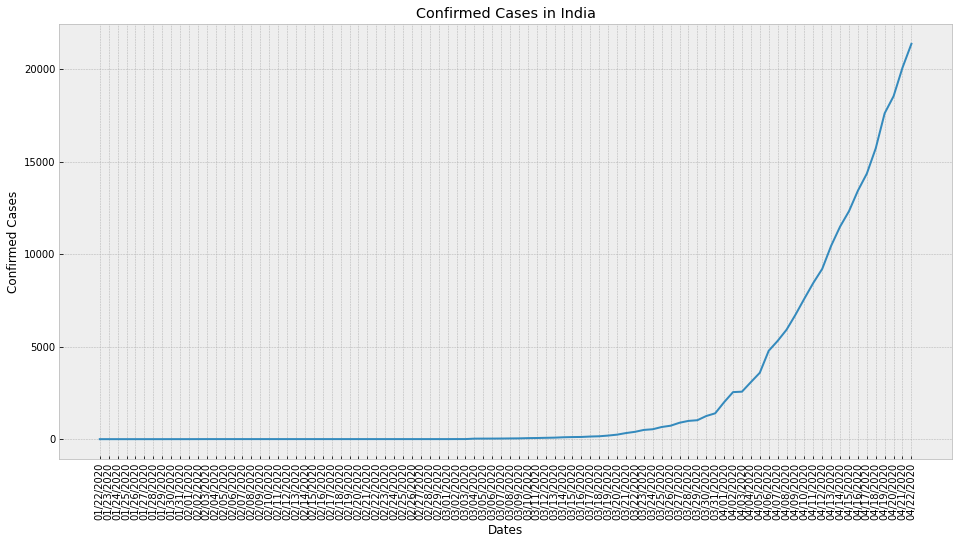

In [1012]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases in India')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(df['India Confirmed Cases'])
plt.xticks(rotation=90)
plt.show()

In [1013]:
df = df[['India Confirmed Cases']]
df.head(4)

,India Confirmed Cases
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0


In [1014]:
future_days = 25
df['India Predicted Cases'] = df[['India Confirmed Cases']].shift(-future_days)
df.head(4)

,India Confirmed Cases,India Predicted Cases
Dates,,
01/22/2020,0,3.0
01/23/2020,0,3.0
01/24/2020,0,3.0
01/25/2020,0,3.0


In [1015]:
df.tail(20)

,India Confirmed Cases,India Predicted Cases
Dates,,
04/03/2020,2567,NaN
04/04/2020,3082,NaN
04/05/2020,3588,NaN
04/06/2020,4778,NaN
04/07/2020,5311,NaN
04/08/2020,5916,NaN
04/09/2020,6725,NaN
04/10/2020,7598,NaN
04/11/2020,8446,NaN


In [1016]:
X = np.array(df.drop(['India Predicted Cases'], 1))[:-future_days]
print(X)

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  1]
 [  1]
 [  1]
 [  2]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  5]
 [  5]
 [ 28]
 [ 30]
 [ 31]
 [ 34]
 [ 39]
 [ 43]
 [ 56]
 [ 62]
 [ 73]
 [ 82]
 [102]
 [113]
 [119]
 [142]
 [156]
 [194]
 [244]
 [330]
 [396]
 [499]
 [536]
 [657]
 [727]
 [887]
 [987]]


In [1017]:
y = np.array(df['India Predicted Cases'])[:-future_days]
print(y)

[3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 5.0000e+00 5.0000e+00 2.8000e+01
 3.0000e+01 3.1000e+01 3.4000e+01 3.9000e+01 4.3000e+01 5.6000e+01
 6.2000e+01 7.3000e+01 8.2000e+01 1.0200e+02 1.1300e+02 1.1900e+02
 1.4200e+02 1.5600e+02 1.9400e+02 2.4400e+02 3.3000e+02 3.9600e+02
 4.9900e+02 5.3600e+02 6.5700e+02 7.2700e+02 8.8700e+02 9.8700e+02
 1.0240e+03 1.2510e+03 1.3970e+03 1.9980e+03 2.5430e+03 2.5670e+03
 3.0820e+03 3.5880e+03 4.7780e+03 5.3110e+03 5.9160e+03 6.7250e+03
 7.5980e+03 8.4460e+03 9.2050e+03 1.0453e+04 1.1487e+04 1.2322e+04
 1.3430e+04 1.4352e+04 1.5722e+04 1.7615e+04 1.8539e+04 2.0080e+04
 2.1370e+04]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [0]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [1020]:
x_future = df.drop(['India Predicted Cases'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 28],
       [ 30],
       [ 31],
       [ 34],
       [ 39],
       [ 43],
       [ 56],
       [ 62],
       [ 73],
       [ 82],
       [102],
       [113],
       [119],
       [142],
       [156],
       [194],
       [244],
       [330],
       [396],
       [499],
       [536],
       [657],
       [727],
       [887],
       [987]])

In [1021]:
tree_predictions = tree.predict(x_future)
print(tree_predictions)
print()
lr_predictions = lr.predict(x_future)
print(lr_predictions)

[ 1024.  1251.  1251.  1998.  2543.  2567.  3082.  3588.  4778.  5311.
  5916.  6725.  6725.  8446.  9205.  9205. 11487. 12322. 13430. 15722.
 15722. 17615. 17615. 21370. 21370.]

[ 1627.72289283  1679.88310517  1705.96321134  1784.20352984
  1914.60406068  2018.92448535  2357.96586553  2514.44650253
  2801.32767038  3036.04862589  3557.65074924  3844.53191708
  4001.01255409  4600.85499594  4965.97648229  5957.02051666
  7261.02582504  9503.91495545 11225.20196251 13911.45289778
 14876.41682598 18032.10967226 19857.71710399 24030.53409081
 26638.54470757]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


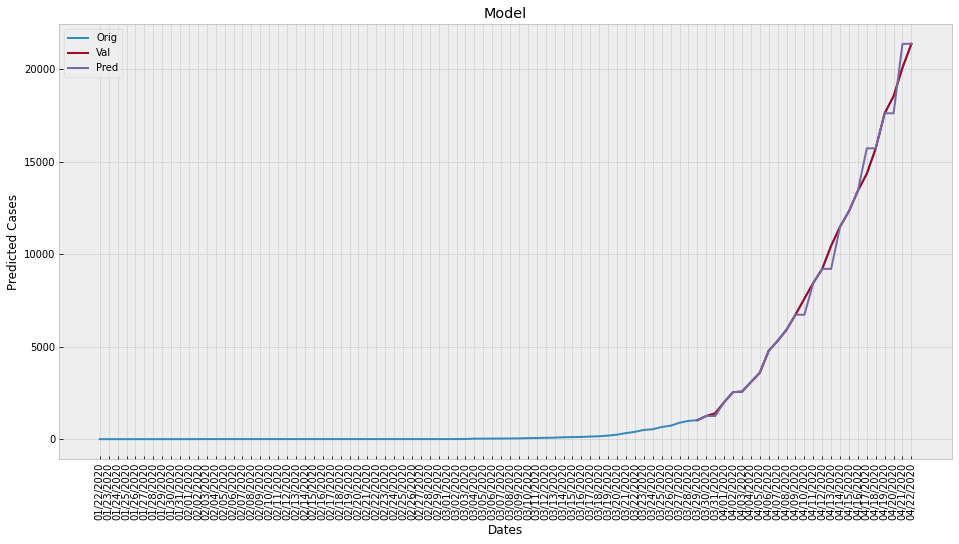

In [1022]:
predictions = tree_predictions

valid = df[X.shape[0]:]
valid['India Predicted Cases'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df['India Confirmed Cases'])
plt.plot(valid['India Confirmed Cases'])
plt.plot(valid['India Predicted Cases'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [1023]:
valid

,India Confirmed Cases,India Predicted Cases
Dates,,
03/29/2020,1024,1024.0
03/30/2020,1251,1251.0
03/31/2020,1397,1251.0
04/01/2020,1998,1998.0
04/02/2020,2543,2543.0
04/03/2020,2567,2567.0
04/04/2020,3082,3082.0
04/05/2020,3588,3588.0
04/06/2020,4778,4778.0


In [1024]:
from sklearn.metrics import r2_score
score = r2_score(valid['India Confirmed Cases'], valid['India Predicted Cases'])
print(score)

0.9931225688808232


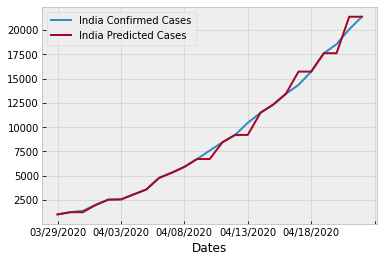

In [1025]:
valid.plot()

In [1026]:
df2 = pd.read_csv('/content/drive/My Drive/Total_cases_India.csv', index_col = 'Dates')
df2 = df2.rename(columns={"Confirmed Rcovered": "India Confirmed Recovered", \
                        "Confirmed Deaths": "India Confirmed Deaths"})
#df2 = df2.iloc[:79]
df2.tail(19)

,India Confirmed Cases,India Confirmed Deaths,India Confirmed Recovered
Dates,,,
04/04/2020,3082,86,229
04/05/2020,3588,99,229
04/06/2020,4778,136,375
04/07/2020,5311,150,421
04/08/2020,5916,178,506
04/09/2020,6725,226,620
04/10/2020,7598,246,774
04/11/2020,8446,288,969
04/12/2020,9205,331,1080


In [0]:
df2 = df2[['India Confirmed Deaths']]

In [1028]:
df2.head()

,India Confirmed Deaths
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0
01/26/2020,0


In [1029]:
future_days_deaths = 25
df2['India Predicted Deaths'] = df2[['India Confirmed Deaths']].shift(-future_days_deaths)
df2.tail(4)

,India Confirmed Deaths,India Predicted Deaths
Dates,,
04/19/2020,559,NaN
04/20/2020,592,NaN
04/21/2020,645,NaN
04/22/2020,681,NaN


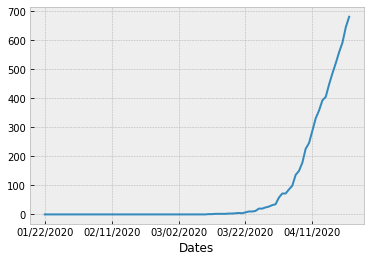

In [1030]:
df2['India Confirmed Deaths'].plot()

In [1031]:
X1 = np.array(df2.drop(['India Predicted Deaths'], 1))[:-future_days_deaths]
print(X1)

[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 4]
 [ 5]
 [ 4]
 [ 7]
 [10]
 [10]
 [12]
 [20]
 [20]
 [24]]


In [1032]:
y1 = np.array(df2['India Predicted Deaths'])[:-future_days_deaths]
print(y1)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   2.   2.
   2.   2.   3.   3.   4.   5.   4.   7.  10.  10.  12.  20.  20.  24.
  27.  32.  35.  58.  72.  72.  86.  99. 136. 150. 178. 226. 246. 288.
 331. 358. 393. 405. 448. 486. 521. 559. 592. 645. 681.]


In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.25)


In [0]:
tree2 = DecisionTreeRegressor().fit(x_train2, y_train2)
lr2 = LinearRegression().fit(x_train2, y_train2)

In [1035]:
x_future2 = df2.drop(['India Predicted Deaths'], 1)[:-future_days_deaths]
x_future2 = x_future2.tail(future_days_deaths)
x_future2 = np.array(x_future2)
x_future2

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 4],
       [ 5],
       [ 4],
       [ 7],
       [10],
       [10],
       [12],
       [20],
       [20],
       [24]])

In [1036]:
tree_predictions2 = tree2.predict(x_future2)
print(tree_predictions2)
print()
lr_predictions2 = lr2.predict(x_future2)
print(lr_predictions2)

[ 10.55555556  10.55555556  10.55555556  10.55555556  10.55555556
  10.55555556  10.55555556 117.5        117.5        164.
 164.         164.         164.         309.5        309.5
 381.5        393.         381.5        448.         503.5
 503.5        559.         592.         592.         592.        ]

[  36.77331452   36.77331452   36.77331452   36.77331452   36.77331452
   36.77331452   36.77331452   78.26538921   78.26538921  119.7574639
  119.7574639   119.7574639   119.7574639   161.2495386   161.2495386
  202.74161329  244.23368798  202.74161329  327.21783737  451.69406145
  451.69406145  534.67821083  866.61480838  866.61480838 1032.58310715]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


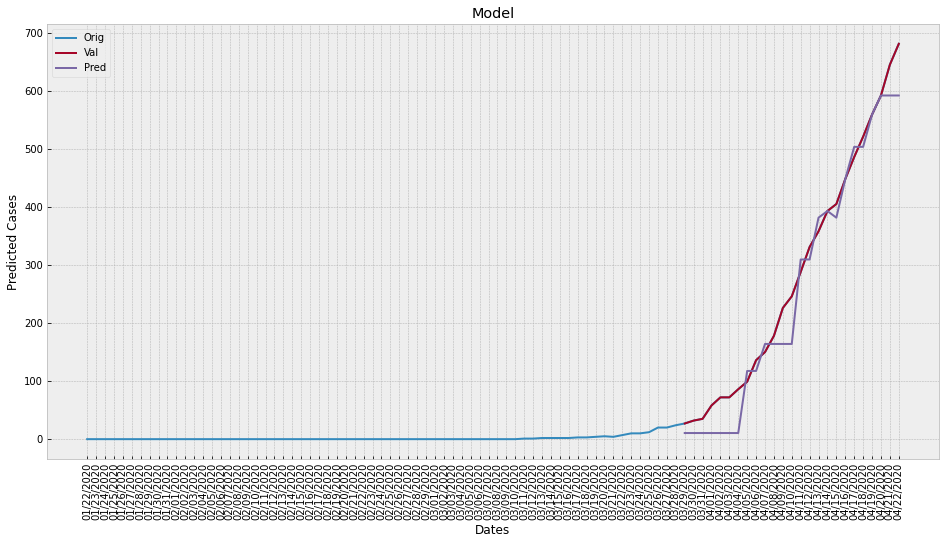

In [1037]:
predictions2 = tree_predictions2

valid2 = df2[X1.shape[0]:]
valid2['India Predicted Deaths'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df2['India Confirmed Deaths'])
plt.plot(valid2['India Confirmed Deaths'])
plt.plot(valid2['India Predicted Deaths'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [1038]:
from sklearn.metrics import r2_score
score2 = r2_score(valid2['India Confirmed Deaths'], valid2['India Predicted Deaths'])
print(score2)

0.9612019083246696


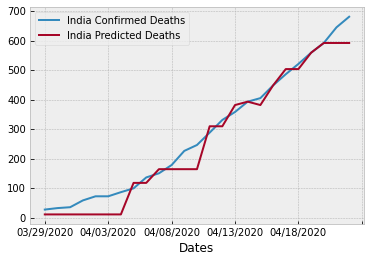

In [1039]:
valid2.plot()

In [1040]:
df3 = pd.read_csv('/content/drive/My Drive/Total_cases_India.csv', index_col = 'Dates')
#df3 = df3.iloc[:79]
df3 = df3.rename(columns={"Confirmed Rcovered": "India Confirmed Recovered", \
                        "Confirmed Deaths": "India Confirmed Deaths"})
df3.tail(19)

,India Confirmed Cases,India Confirmed Deaths,India Confirmed Recovered
Dates,,,
04/04/2020,3082,86,229
04/05/2020,3588,99,229
04/06/2020,4778,136,375
04/07/2020,5311,150,421
04/08/2020,5916,178,506
04/09/2020,6725,226,620
04/10/2020,7598,246,774
04/11/2020,8446,288,969
04/12/2020,9205,331,1080


In [0]:
df3 = df3[['India Confirmed Recovered']]

In [1042]:
df3.head()

,India Confirmed Recovered
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0
01/26/2020,0


In [0]:
future_days_recover = 25

In [1044]:
df3['India Predicted Recovered'] = df3[['India Confirmed Recovered']].shift(-future_days_recover)
df3.tail(4)

,India Confirmed Recovered,India Predicted Recovered
Dates,,
04/19/2020,2854,NaN
04/20/2020,3273,NaN
04/21/2020,3975,NaN
04/22/2020,4370,NaN


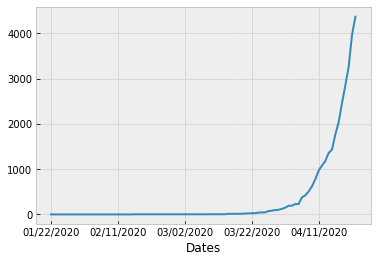

In [1045]:
df3['India Confirmed Recovered'].plot()

In [1046]:
X2 = np.array(df3.drop(['India Predicted Recovered'], 1))[:-future_days_recover]
print(X2)

[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [13]
 [13]
 [14]
 [14]
 [15]
 [20]
 [23]
 [27]
 [27]
 [40]
 [43]
 [45]
 [73]
 [84]]


In [1047]:
y2 = np.array(df3['India Predicted Recovered'])[:-future_days_recover]
print(y2)

[3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 4.000e+00 4.000e+00 4.000e+00 4.000e+00 4.000e+00
 1.300e+01 1.300e+01 1.400e+01 1.400e+01 1.500e+01 2.000e+01 2.300e+01
 2.700e+01 2.700e+01 4.000e+01 4.300e+01 4.500e+01 7.300e+01 8.400e+01
 9.500e+01 1.020e+02 1.230e+02 1.480e+02 1.910e+02 1.920e+02 2.290e+02
 2.290e+02 3.750e+02 4.210e+02 5.060e+02 6.200e+02 7.740e+02 9.690e+02
 1.080e+03 1.181e+03 1.359e+03 1.432e+03 1.768e+03 2.041e+03 2.463e+03
 2.854e+03 3.273e+03 3.975e+03 4.370e+03]


In [0]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.25)


In [0]:
tree3 = DecisionTreeRegressor().fit(x_train3, y_train3)
lr3 = LinearRegression().fit(x_train3, y_train3)

In [1050]:
x_future3 = df3.drop(['India Predicted Recovered'], 1)[:-future_days_recover]
x_future3 = x_future3.tail(future_days_recover)
x_future3 = np.array(x_future3)
x_future3

array([[ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [13],
       [13],
       [14],
       [14],
       [15],
       [20],
       [23],
       [27],
       [27],
       [40],
       [43],
       [45],
       [73],
       [84]])

In [1051]:
tree_predictions3 = tree3.predict(x_future3)
print(tree_predictions3)
print()
lr_predictions3 = lr3.predict(x_future3)
print(lr_predictions3)

[  65.    65.    65.    65.    65.    65.   352.   352.   352.   352.
  352.   774.   774.   969.   969.  1181.  1359.  1359.  1904.5 1904.5
 2463.  2854.  3273.  4370.  4370. ]

[ 186.67879756  186.67879756  186.67879756  186.67879756  186.67879756
  186.67879756  246.8998814   246.8998814   246.8998814   246.8998814
  246.8998814   788.88963597  788.88963597  849.11071982  849.11071982
  909.33180366 1210.43722286 1391.10047439 1631.98480975 1631.98480975
 2414.85889969 2595.52215121 2715.96431889 4402.15466645 5064.5865887 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


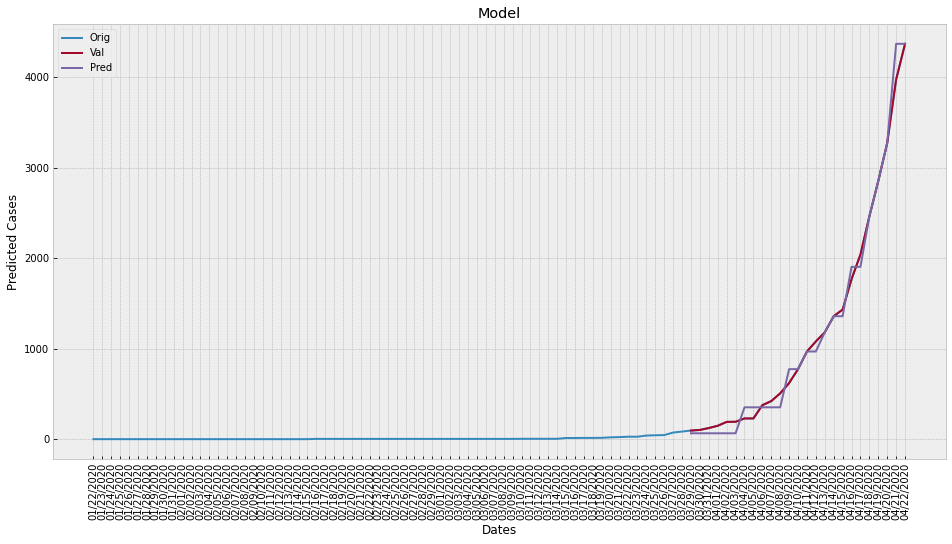

In [1052]:
predictions3 = tree_predictions3

valid3 = df3[X2.shape[0]:]
valid3['India Predicted Recovered'] = predictions3

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df3['India Confirmed Recovered'])
plt.plot(valid3['India Confirmed Recovered'])
plt.plot(valid3['India Predicted Recovered'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [1053]:
valid3

,India Confirmed Recovered,India Predicted Recovered
Dates,,
03/29/2020,95,65.0
03/30/2020,102,65.0
03/31/2020,123,65.0
04/01/2020,148,65.0
04/02/2020,191,65.0
04/03/2020,192,65.0
04/04/2020,229,352.0
04/05/2020,229,352.0
04/06/2020,375,352.0


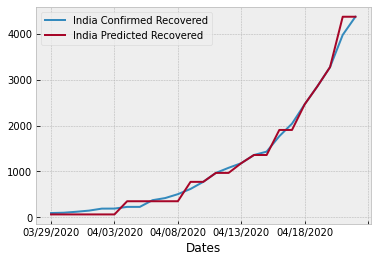

In [1054]:
valid3.plot()

In [1055]:
valid_final1 = valid.join(valid2.join(valid3))
valid_final1

,India Confirmed Cases,India Predicted Cases,India Confirmed Deaths,India Predicted Deaths,India Confirmed Recovered,India Predicted Recovered
Dates,,,,,,
03/29/2020,1024,1024.0,27,10.555556,95,65.0
03/30/2020,1251,1251.0,32,10.555556,102,65.0
03/31/2020,1397,1251.0,35,10.555556,123,65.0
04/01/2020,1998,1998.0,58,10.555556,148,65.0
04/02/2020,2543,2543.0,72,10.555556,191,65.0
04/03/2020,2567,2567.0,72,10.555556,192,65.0
04/04/2020,3082,3082.0,86,10.555556,229,352.0
04/05/2020,3588,3588.0,99,117.500000,229,352.0
04/06/2020,4778,4778.0,136,117.500000,375,352.0


In [1056]:
from sklearn.metrics import r2_score
score3 = r2_score(valid3['India Confirmed Recovered'], valid3['India Predicted Recovered'])
print(score3)

0.9911934494302576


In [1057]:
average = (score + score2 + score3) / 3
average

0.9818393088785834

In [0]:
combineddata = valid_final.join(valid_final1)

In [1059]:
combineddata

,China Confirmed Cases,Predicted Cases,Confirmed Deaths,Predicted Deaths,Confirmed Recovered,Predicted Recovered,India Confirmed Cases,India Predicted Cases,India Confirmed Deaths,India Predicted Deaths,India Confirmed Recovered,India Predicted Recovered
Dates,,,,,,,,,,,,
03/29/2020,82122,82122.0,3304,3304.0,75582,75923.0,1024,1024.0,27,10.555556,95,65.0
03/30/2020,82198,82198.0,3308,3309.0,75923,75923.0,1251,1251.0,32,10.555556,102,65.0
03/31/2020,82279,82279.0,3309,3309.0,76206,76206.0,1397,1251.0,35,10.555556,123,65.0
04/01/2020,82361,82432.0,3316,3316.0,76405,76405.0,1998,1998.0,58,10.555556,148,65.0
04/02/2020,82432,82432.0,3322,3322.0,76565,76565.0,2543,2543.0,72,10.555556,191,65.0
04/03/2020,82511,82432.0,3326,3326.0,76760,76760.0,2567,2567.0,72,10.555556,192,65.0
04/04/2020,82543,82602.0,3330,3330.0,76946,76760.0,3082,3082.0,86,10.555556,229,352.0
04/05/2020,82602,82602.0,3333,3333.0,77207,77207.0,3588,3588.0,99,117.500000,229,352.0
04/06/2020,82665,82665.0,3335,3335.0,77310,77310.0,4778,4778.0,136,117.500000,375,352.0


In [1060]:
valid_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 03/29/2020 to 04/22/2020
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   China Confirmed Cases  25 non-null     int64  
 1   Predicted Cases        25 non-null     float64
 2   Confirmed Deaths       25 non-null     int64  
 3   Predicted Deaths       25 non-null     float64
 4   Confirmed Recovered    25 non-null     int64  
 5   Predicted Recovered    25 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.0+ KB


In [1061]:
valid_final1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 03/29/2020 to 04/22/2020
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   India Confirmed Cases      25 non-null     int64  
 1   India Predicted Cases      25 non-null     float64
 2   India Confirmed Deaths     25 non-null     int64  
 3   India Predicted Deaths     25 non-null     float64
 4   India Confirmed Recovered  25 non-null     int64  
 5   India Predicted Recovered  25 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.0+ KB


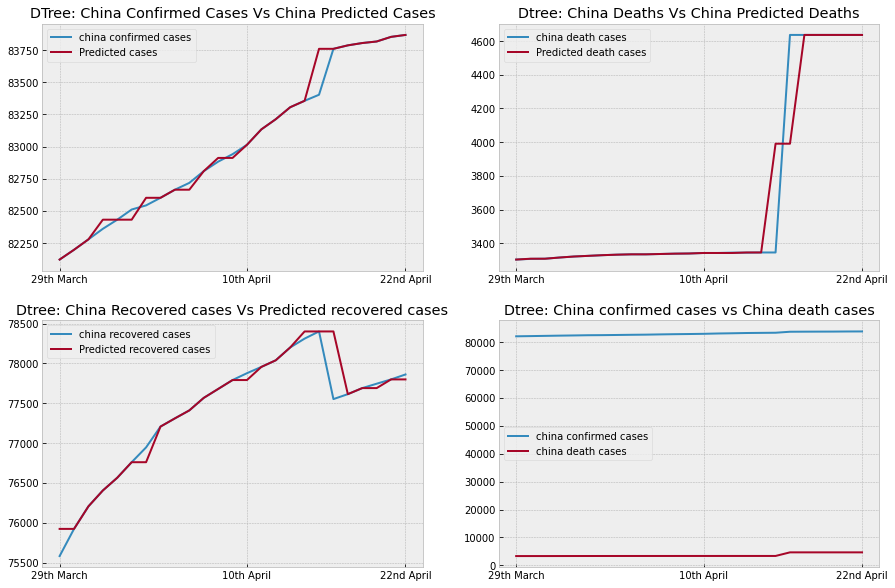

In [1188]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 13, 24], xticklabels=['29th March', '10th April', '22nd April'])

a[0][0].plot(combineddata['China Confirmed Cases']) 
a[0][0].plot(combineddata['Predicted Cases'])
a[0][0].legend(['china confirmed cases','Predicted cases'], loc="upper left")
a[0][0].set_title('DTree: China Confirmed Cases Vs China Predicted Cases')
a[0][1].plot(combineddata['Confirmed Deaths'])
a[0][1].plot(combineddata['Predicted Deaths'])
a[0][1].legend(['china death cases','Predicted death cases'], loc="upper left")
a[0][1].set_title('Dtree: China Deaths Vs China Predicted Deaths')
a[1][0].plot(combineddata['Confirmed Recovered'])
a[1][0].plot(combineddata['Predicted Recovered'])
a[1][0].legend(['china recovered cases','Predicted recovered cases'], loc="upper left")
a[1][0].set_title('Dtree: China Recovered cases Vs Predicted recovered cases')
a[1][1].plot(combineddata['China Confirmed Cases'])
a[1][1].plot(combineddata['Confirmed Deaths'])
a[1][1].legend(['china confirmed cases','china death cases'], loc="center left")
a[1][1].set_title('Dtree: China confirmed cases vs China death cases')

plt.savefig('/content/drive/My Drive/comp_plots/chinagrid_decisiontree.png', dpi=1200)


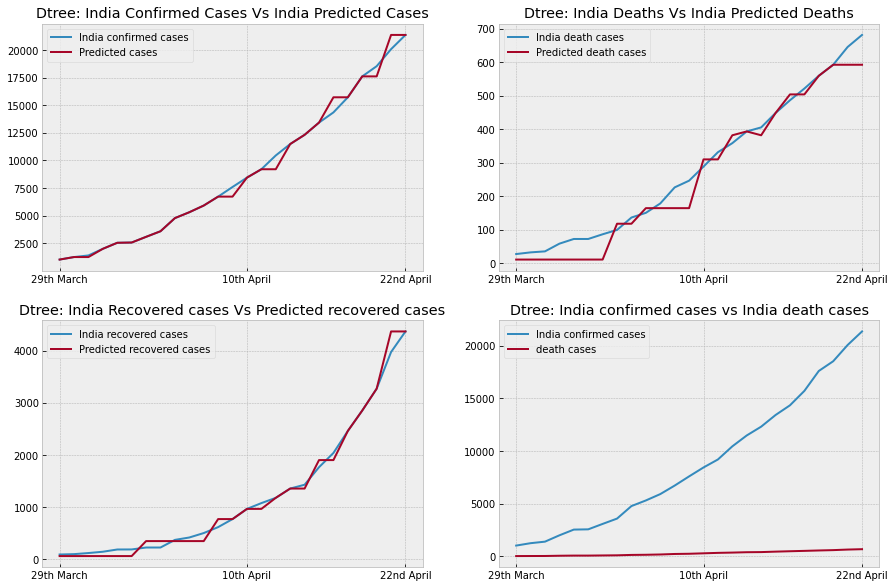

In [1186]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 13, 24], xticklabels=['29th March', '10th April', '22nd April'])

a[0][0].plot(combineddata['India Confirmed Cases']) 
a[0][0].plot(combineddata['India Predicted Cases'])
a[0][0].legend(['India confirmed cases','Predicted cases'], loc="upper left")
a[0][0].set_title('Dtree: India Confirmed Cases Vs India Predicted Cases')
a[0][1].plot(combineddata['India Confirmed Deaths'])
a[0][1].plot(combineddata['India Predicted Deaths'])
a[0][1].legend(['India death cases','Predicted death cases'], loc="upper left")
a[0][1].set_title('Dtree: India Deaths Vs India Predicted Deaths')
a[1][0].plot(combineddata['India Confirmed Recovered'])
a[1][0].plot(combineddata['India Predicted Recovered'])
a[1][0].legend(['India recovered cases','Predicted recovered cases'], loc="upper left")
a[1][0].set_title('Dtree: India Recovered cases Vs Predicted recovered cases')
a[1][1].plot(combineddata['India Confirmed Cases'])
a[1][1].plot(combineddata['India Confirmed Deaths'])
a[1][1].legend(['India confirmed cases','death cases'], loc="upper left")
a[1][1].set_title('Dtree: India confirmed cases vs India death cases')

plt.savefig('/content/drive/My Drive/comp_plots/indiagrid_decisiontree.png', dpi=1200)


In [0]:
newdata1 = newdata.iloc[67:]

In [1065]:
newdata1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 03/29/2020 to 04/22/2020
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   China Confirmed Cases      25 non-null     int64  
 1   China Confirmed Deaths     25 non-null     int64  
 2   China Recovered            25 non-null     int64  
 3   China Predicted Cases      25 non-null     float64
 4   China Predicted Deaths     25 non-null     float64
 5   China Predicted Recovered  25 non-null     float64
 6   India Confirmed Cases      25 non-null     int64  
 7   India Deaths               25 non-null     int64  
 8   India Recovered            25 non-null     int64  
 9   India Predicted Cases      25 non-null     float64
 10  India Predicted Deaths     25 non-null     float64
 11  India Predicted Recovered  25 non-null     float64
dtypes: float64(6), int64(6)
memory usage: 2.5+ KB


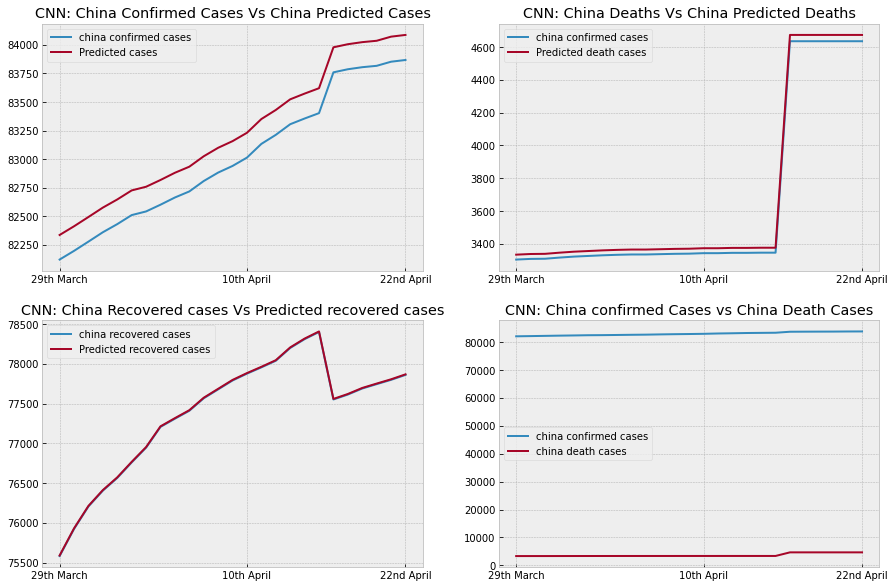

In [1185]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 13, 24], xticklabels=['29th March', '10th April', '22nd April'])

a[0][0].plot(newdata1['China Confirmed Cases']) 
a[0][0].plot(newdata1['China Predicted Cases'])
a[0][0].legend(['china confirmed cases','Predicted cases'], loc="upper left")
a[0][0].set_title('CNN: China Confirmed Cases Vs China Predicted Cases')
a[0][1].plot(newdata1['China Confirmed Deaths'])
a[0][1].plot(newdata1['China Predicted Deaths'])
a[0][1].legend(['china confirmed cases','Predicted death cases'], loc="upper left")
a[0][1].set_title('CNN: China Deaths Vs China Predicted Deaths')
a[1][0].plot(newdata1['China Recovered'])
a[1][0].plot(newdata1['China Predicted Recovered'])
a[1][0].legend(['china recovered cases','Predicted recovered cases'], loc="upper left")
a[1][0].set_title('CNN: China Recovered cases Vs Predicted recovered cases')
a[1][1].plot(newdata1['China Confirmed Cases'])
a[1][1].plot(newdata1['China Confirmed Deaths'])
a[1][1].legend(['china confirmed cases','china death cases'], loc="center left")
a[1][1].set_title('CNN: China confirmed Cases vs China Death Cases')

plt.savefig('/content/drive/My Drive/comp_plots/chinagrid_cnnregressor.png', dpi=1200)


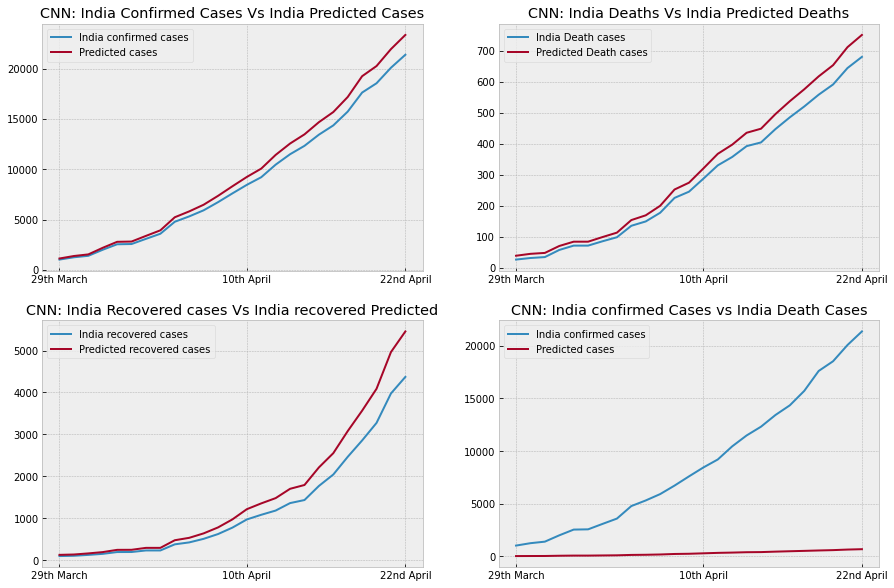

In [1183]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 13, 24], xticklabels=['29th March', '10th April', '22nd April'])

a[0][0].plot(newdata1['India Confirmed Cases']) 
a[0][0].plot(newdata1['India Predicted Cases'])
a[0][0].legend(['India confirmed cases','Predicted cases'], loc="upper left")
a[0][0].set_title('CNN: India Confirmed Cases Vs India Predicted Cases')
a[0][1].plot(newdata1['India Deaths'])
a[0][1].plot(newdata1['India Predicted Deaths'])
a[0][1].legend(['India Death cases','Predicted Death cases'], loc="upper left")
a[0][1].set_title('CNN: India Deaths Vs India Predicted Deaths')
a[1][0].plot(newdata1['India Recovered'])
a[1][0].plot(newdata1['India Predicted Recovered'])
a[1][0].legend(['India recovered cases','Predicted recovered cases'], loc="upper left")
a[1][0].set_title('CNN: India Recovered cases Vs India recovered Predicted')
a[1][1].plot(newdata1['India Confirmed Cases'])
a[1][1].plot(newdata1['India Deaths'])
a[1][1].legend(['India confirmed cases','Predicted cases'], loc="upper left")
a[1][1].set_title('CNN: India confirmed Cases vs India Death Cases')

plt.savefig('/content/drive/My Drive/comp_plots/indiagrid_cnnregressor.png', dpi=1200)


**LSTM for China and India Data Combined**

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [0]:
dflstm = pd.read_csv('/content/drive/My Drive/Total_cases_China (1).csv', index_col='Dates')

In [1070]:
print(dflstm)

            China Confirmed Cases  Confirmed Deaths  Confirmed Recovered
Dates                                                                   
01/22/2020                    548                17                   28
01/23/2020                    643                18                   30
01/24/2020                    920                26                   36
01/25/2020                   1406                42                   39
01/26/2020                   2075                56                   49
01/27/2020                   2877                82                   58
01/28/2020                   5509               131                  101
01/29/2020                   6087               133                  120
01/30/2020                   8141               171                  135
01/31/2020                   9802               213                  214
02/01/2020                  11891               259                  275
02/02/2020                  16630               361

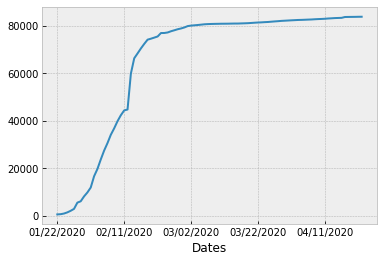

In [1071]:
dflstm['China Confirmed Cases'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data = dflstm.filter(['China Confirmed Cases'])

In [0]:
dataset = data.values

In [1074]:
training_data_len = math.ceil(len(dataset) * 0.7)
training_data_len

65

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [1076]:
scaled_data

array([[0.        ],
       [0.00114018],
       [0.00446471],
       [0.01029765],
       [0.01832693],
       [0.02795247],
       [0.05954153],
       [0.06647864],
       [0.09113058],
       [0.11106577],
       [0.13613778],
       [0.19301488],
       [0.23005281],
       [0.27795247],
       [0.32275564],
       [0.36052568],
       [0.40280845],
       [0.43526164],
       [0.47144743],
       [0.50175228],
       [0.52614018],
       [0.5306169 ],
       [0.71227796],
       [0.78984638],
       [0.81451032],
       [0.83971435],
       [0.86277004],
       [0.88409746],
       [0.88899424],
       [0.89449112],
       [0.90016803],
       [0.91758281],
       [0.91783485],
       [0.92046327],
       [0.92662026],
       [0.93156505],
       [0.93677388],
       [0.94071051],
       [0.94584734],
       [0.95276044],
       [0.95520883],
       [0.95670907],
       [0.95820931],
       [0.9600216 ],
       [0.9618579 ],
       [0.96281805],
       [0.96345415],
       [0.963

In [1077]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.00114018, 0.00446471, 0.01029765, 0.01832693,
       0.02795247, 0.05954153, 0.06647864, 0.09113058, 0.11106577])]
[0.1361377820451272]



In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [1079]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(55, 10, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [1082]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
55/55 [==============================] - 1s 17ms/step - loss: 0.0758
Epoch 2/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 3/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 4/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 5/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 6/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 7/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 8/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 9/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 10/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 11/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 12/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 13/50
55/55 [=============================

In [0]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])
  

In [1084]:
len(test_data)

37

In [0]:
x_test = np.array(x_test)


In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [1087]:
x_test

array([[[0.9662746 ],
        [0.96680269],
        [0.96745079],
        [0.96857897],
        [0.96977916],
        [0.97079933],
        [0.97155545],
        [0.97267163],
        [0.97351176],
        [0.97496399]],

       [[0.96680269],
        [0.96745079],
        [0.96857897],
        [0.96977916],
        [0.97079933],
        [0.97155545],
        [0.97267163],
        [0.97351176],
        [0.97496399],
        [0.97634422]],

       [[0.96745079],
        [0.96857897],
        [0.96977916],
        [0.97079933],
        [0.97155545],
        [0.97267163],
        [0.97351176],
        [0.97496399],
        [0.97634422],
        [0.97756841]],

       [[0.96857897],
        [0.96977916],
        [0.97079933],
        [0.97155545],
        [0.97267163],
        [0.97351176],
        [0.97496399],
        [0.97634422],
        [0.97756841],
        [0.97904465]],

       [[0.96977916],
        [0.97079933],
        [0.97155545],
        [0.97267163],
        [0.97351176],
  

In [1088]:
len(x_test)

27

In [1089]:
len(x_train)

55

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [1091]:
predictions

array([[81180.07 ],
       [81208.21 ],
       [81237.7  ],
       [81269.125],
       [81299.49 ],
       [81328.66 ],
       [81356.875],
       [81383.98 ],
       [81410.21 ],
       [81433.69 ],
       [81455.28 ],
       [81475.75 ],
       [81495.04 ],
       [81515.02 ],
       [81535.56 ],
       [81555.64 ],
       [81575.836],
       [81598.63 ],
       [81621.97 ],
       [81646.625],
       [81669.93 ],
       [81691.48 ],
       [81727.02 ],
       [81760.51 ],
       [81789.55 ],
       [81813.516],
       [81834.016]], dtype=float32)

In [1092]:
len(predictions)

27

In [1093]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse


1422.4673032407406

In [1094]:
train = data[:training_data_len]
validchina1 = data[training_data_len:]
validchina1['Predicted Cases'] = predictions



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


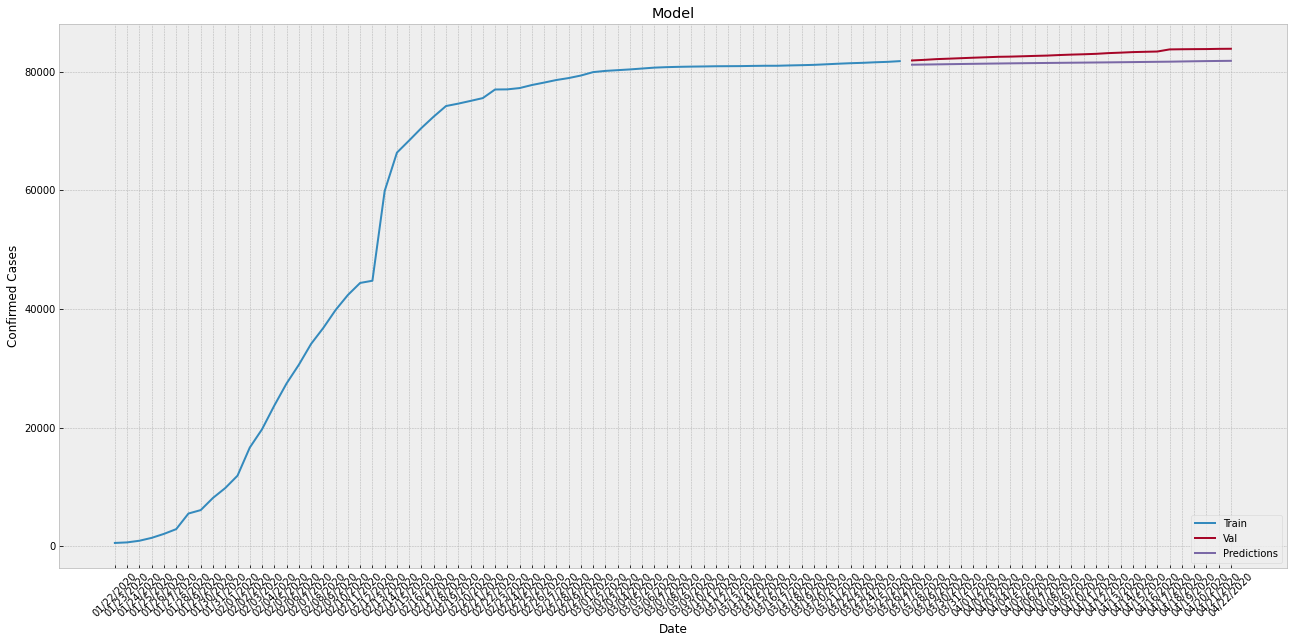

In [1095]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(train['China Confirmed Cases'])
plt.plot(validchina1[['China Confirmed Cases', 'Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
#plt.show()

In [1096]:
validchina1

,China Confirmed Cases,Predicted Cases
Dates,,
03/27/2020,81897,81180.070312
03/28/2020,81999,81208.210938
03/29/2020,82122,81237.703125
03/30/2020,82198,81269.125000
03/31/2020,82279,81299.492188
04/01/2020,82361,81328.656250
04/02/2020,82432,81356.875000
04/03/2020,82511,81383.976562
04/04/2020,82543,81410.210938


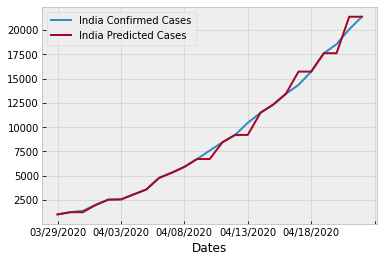

In [1097]:
valid.plot()

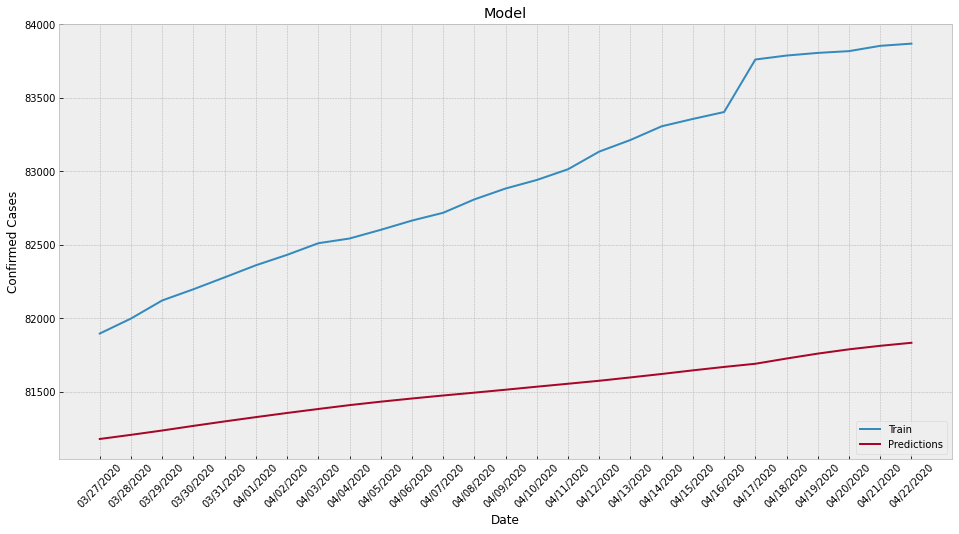

In [1098]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(validchina1)
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
#plt.show()

In [1099]:
from sklearn.metrics import r2_score
score = r2_score(validchina1['China Confirmed Cases'], validchina1['Predicted Cases'])
print(score)

-4.9110776237431235


LSTM FOR CHINA DEATHS

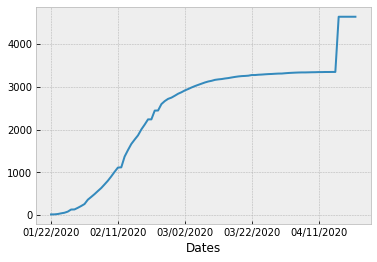

In [1100]:
df2 = dflstm['Confirmed Deaths'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data2 = dflstm.filter(['Confirmed Deaths'])

In [0]:
dataset2 = data2.values

In [1103]:
training_data_len2 = math.ceil(len(dataset2) * 0.7)
training_data_len2

65

In [0]:
scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler.fit_transform(dataset2)

In [1105]:
scaled_data2

array([[0.00000000e+00],
       [2.16497077e-04],
       [1.94847370e-03],
       [5.41242693e-03],
       [8.44338601e-03],
       [1.40723100e-02],
       [2.46806668e-02],
       [2.51136610e-02],
       [3.33405499e-02],
       [4.24334271e-02],
       [5.23922927e-02],
       [7.44749946e-02],
       [8.83308075e-02],
       [1.02619615e-01],
       [1.18207404e-01],
       [1.33362200e-01],
       [1.51764451e-01],
       [1.70599697e-01],
       [1.92249405e-01],
       [2.15414592e-01],
       [2.37064300e-01],
       [2.38146785e-01],
       [2.92704048e-01],
       [3.25611604e-01],
       [3.56354189e-01],
       [3.78653388e-01],
       [3.99870102e-01],
       [4.29963195e-01],
       [4.54427365e-01],
       [4.80840009e-01],
       [4.80840009e-01],
       [5.25221910e-01],
       [5.25654904e-01],
       [5.58129465e-01],
       [5.73284261e-01],
       [5.84542109e-01],
       [5.90820524e-01],
       [6.00346395e-01],
       [6.10521758e-01],
       [6.18099156e-01],


In [1106]:
train_data2 = scaled_data2[0:training_data_len2, :]
x_train2 = []
y_train2 = []

for i in range(10, len(train_data2)):
  x_train2.append(train_data2[i-10:i, 0])
  y_train2.append(train_data2[i, 0])
  if i<= 10:
    print(x_train2)
    print(y_train2)
    print()

[array([0.        , 0.0002165 , 0.00194847, 0.00541243, 0.00844339,
       0.01407231, 0.02468067, 0.02511366, 0.03334055, 0.04243343])]
[0.05239229270404849]



In [0]:
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

In [1108]:
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
x_train2.shape

(55, 10, 1)

In [0]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [0]:
#compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')


In [1111]:
model2.fit(x_train2, y_train2, batch_size=1, epochs=50)

Epoch 1/50
55/55 [==============================] - 1s 16ms/step - loss: 0.0204
Epoch 2/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 3/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 4/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 5/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 6/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 7/50
55/55 [==============================] - 0s 7ms/step - loss: 8.2685e-04
Epoch 8/50
55/55 [==============================] - 0s 8ms/step - loss: 9.3425e-04
Epoch 9/50
55/55 [==============================] - 0s 8ms/step - loss: 4.8309e-04
Epoch 10/50
55/55 [==============================] - 0s 7ms/step - loss: 3.5074e-04
Epoch 11/50
55/55 [==============================] - 0s 7ms/step - loss: 2.3275e-04
Epoch 12/50
55/55 [==============================] - 0s 7ms/step - loss: 1.3612e-04
Epoch 13/50
55/55 [=====

In [0]:
test_data2 = scaled_data2[training_data_len2-10: , :]
x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
for i in range(10, len(test_data2)):
  x_test2.append(test_data2[i-10:i, 0])
  

In [1113]:
len(test_data2)

37

In [0]:
x_test2 = np.array(x_test2)

In [0]:
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))

In [0]:
predictions2 = model.predict(x_test2)
predictions2 = scaler.inverse_transform(predictions2)

In [1117]:
rmse = np.sqrt( np.mean( predictions2 - y_test )**2)
rmse

78874.20444516782

In [1118]:
train2 = data2[:training_data_len2]
validchina2 = data2[training_data_len2:]
validchina2['Predicted Deaths'] = predictions2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1119]:
validchina2


,Confirmed Deaths,Predicted Deaths
Dates,,
03/27/2020,3296,3992.650146
03/28/2020,3299,3995.775146
03/29/2020,3304,3998.557373
03/30/2020,3308,4001.194092
03/31/2020,3309,4003.750244
04/01/2020,3316,4006.001221
04/02/2020,3322,4008.108887
04/03/2020,3326,4010.443848
04/04/2020,3330,4012.725830


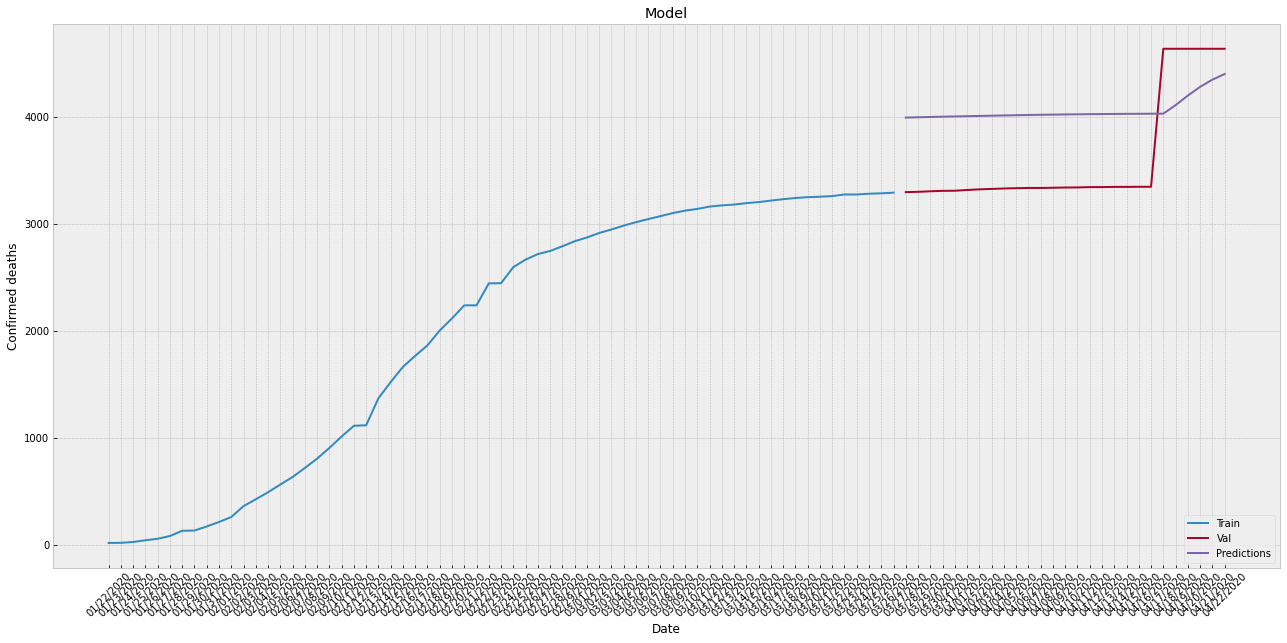

In [1120]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed deaths', fontsize=12)
plt.plot(train2['Confirmed Deaths'])
plt.plot(validchina2[['Confirmed Deaths', 'Predicted Deaths']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
plt.show()

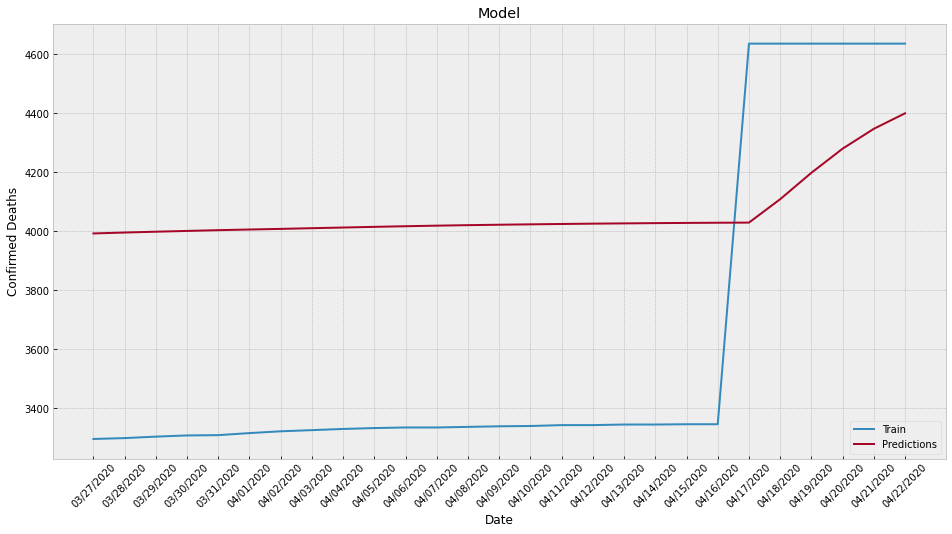

In [1121]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Deaths', fontsize=12)
plt.plot(validchina2)
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

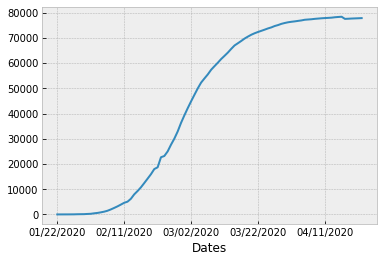

In [1122]:
df3 = dflstm['Confirmed Recovered'].plot()


In [0]:
data3 = dflstm.filter(['Confirmed Recovered'])

In [0]:
dataset3 = data3.values

In [1125]:
training_data_len3 = math.ceil(len(dataset3) * 0.7)
training_data_len3

65

In [0]:
scaler3 = MinMaxScaler(feature_range=(0,1))
scaled_data3 = scaler.fit_transform(dataset3)

In [1127]:
scaled_data3

array([[0.00000000e+00],
       [2.55189925e-05],
       [1.02075970e-04],
       [1.40354459e-04],
       [2.67949421e-04],
       [3.82784888e-04],
       [9.31443227e-04],
       [1.17387366e-03],
       [1.36526610e-03],
       [2.37326630e-03],
       [3.15159558e-03],
       [5.55038087e-03],
       [7.47706481e-03],
       [1.03989894e-02],
       [1.38695724e-02],
       [1.84885101e-02],
       [2.51489671e-02],
       [3.27663864e-02],
       [4.07155525e-02],
       [4.96344404e-02],
       [5.87957587e-02],
       [6.44864941e-02],
       [7.89685223e-02],
       [1.01425236e-01],
       [1.18280530e-01],
       [1.36871116e-01],
       [1.58651576e-01],
       [1.80904138e-01],
       [2.03309813e-01],
       [2.29492300e-01],
       [2.38296352e-01],
       [2.89270540e-01],
       [2.95497174e-01],
       [3.18821533e-01],
       [3.52774552e-01],
       [3.83499419e-01],
       [4.19812946e-01],
       [4.63182474e-01],
       [5.01346127e-01],
       [5.37608615e-01],


In [1128]:
train_data3 = scaled_data3[0:training_data_len2, :]
x_train3 = []
y_train3 = []

for i in range(10, len(train_data3)):
  x_train3.append(train_data3[i-10:i, 0])
  y_train3.append(train_data3[i, 0])
  if i<= 10:
    print(x_train3)
    print(y_train3)
    print()

[array([0.00000000e+00, 2.55189925e-05, 1.02075970e-04, 1.40354459e-04,
       2.67949421e-04, 3.82784888e-04, 9.31443227e-04, 1.17387366e-03,
       1.36526610e-03, 2.37326630e-03])]
[0.0031515955750066986]



In [0]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)

In [1130]:
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_train3.shape

(55, 10, 1)

In [0]:
model3 = Sequential()
model3.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model3.add(LSTM(50, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))

In [0]:
model3.compile(optimizer='adam', loss='mean_squared_error')


In [1133]:
model3.fit(x_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
55/55 [==============================] - 1s 16ms/step - loss: 0.0372
Epoch 2/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0117
Epoch 3/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 4/50
55/55 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 5/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 6/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 7/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 8/50
55/55 [==============================] - 0s 7ms/step - loss: 5.3200e-04
Epoch 9/50
55/55 [==============================] - 0s 6ms/step - loss: 5.5984e-04
Epoch 10/50
55/55 [==============================] - 0s 7ms/step - loss: 4.0822e-04
Epoch 11/50
55/55 [==============================] - 0s 7ms/step - loss: 2.3437e-04
Epoch 12/50
55/55 [==============================] - 0s 6ms/step - loss: 1.7918e-04
Epoch 13/50
55/55 [=========

In [0]:
test_data3 = scaled_data3[training_data_len3-10: , :]
x_test3 = []
y_test3 = dataset3[training_data_len3:, :]
for i in range(10, len(test_data3)):
  x_test3.append(test_data2[i-10:i, 0])
  

In [1135]:
len(test_data3)

37

In [0]:
x_test3 = np.array(x_test3)

In [0]:
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1 ))

In [0]:
predictions3 = model.predict(x_test3)
predictions3 = scaler.inverse_transform(predictions3)

In [1139]:
rmse = np.sqrt( np.mean( predictions3 - y_test )**2)
rmse

14275.463541666666

In [1140]:
train3 = data3[:training_data_len3]
validchina3 = data3[training_data_len3:]
validchina3['Predicted Recovered Cases'] = predictions3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1141]:
validchina3


,Confirmed Recovered,Predicted Recovered Cases
Dates,,
03/27/2020,74720,67484.945312
03/28/2020,75100,67537.968750
03/29/2020,75582,67585.171875
03/30/2020,75923,67629.914062
03/31/2020,76206,67673.289062
04/01/2020,76405,67711.476562
04/02/2020,76565,67747.242188
04/03/2020,76760,67786.859375
04/04/2020,76946,67825.578125


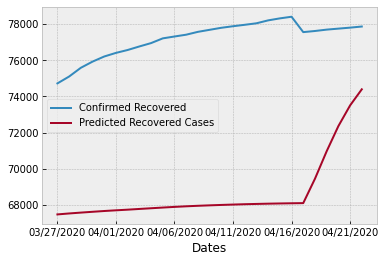

In [1142]:
validchina3.plot()

In [1143]:
valid_final_lstm = validchina1.join(validchina2.join(validchina3))
valid_final_lstm

,China Confirmed Cases,Predicted Cases,Confirmed Deaths,Predicted Deaths,Confirmed Recovered,Predicted Recovered Cases
Dates,,,,,,
03/27/2020,81897,81180.070312,3296,3992.650146,74720,67484.945312
03/28/2020,81999,81208.210938,3299,3995.775146,75100,67537.968750
03/29/2020,82122,81237.703125,3304,3998.557373,75582,67585.171875
03/30/2020,82198,81269.125000,3308,4001.194092,75923,67629.914062
03/31/2020,82279,81299.492188,3309,4003.750244,76206,67673.289062
04/01/2020,82361,81328.656250,3316,4006.001221,76405,67711.476562
04/02/2020,82432,81356.875000,3322,4008.108887,76565,67747.242188
04/03/2020,82511,81383.976562,3326,4010.443848,76760,67786.859375
04/04/2020,82543,81410.210938,3330,4012.725830,76946,67825.578125


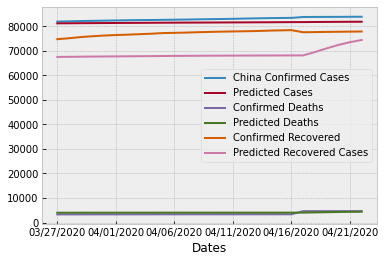

In [1144]:
valid_final_lstm.plot()

In [0]:
from sklearn.metrics import *

In [1146]:
score = r2_score(valid_final_lstm['China Confirmed Cases'], valid_final_lstm['Predicted Cases'])
score

-4.9110776237431235

In [1147]:
score1 = r2_score(valid_final_lstm['Confirmed Deaths'], valid_final_lstm['Predicted Deaths'])
score1

-0.37704775174126115

In [1148]:
score3 = r2_score(valid_final_lstm['Confirmed Recovered'], valid_final_lstm['Predicted Recovered Cases'])
score3

-81.24397628141433

In [1149]:
Average = (score + score1 + score3) / 3
Average

-28.844033885632907

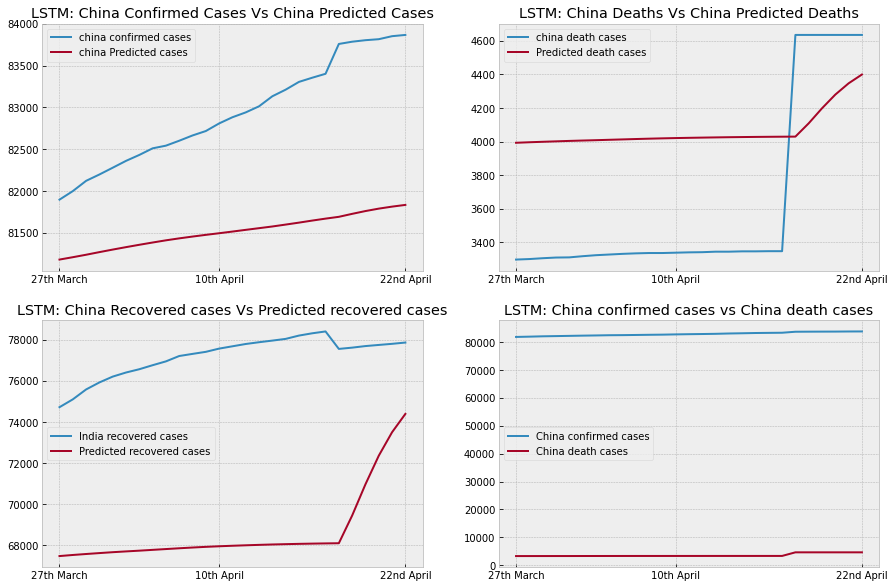

In [1182]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 12, 26], xticklabels=['27th March', '10th April', '22nd April'])

a[0][0].plot(valid_final_lstm['China Confirmed Cases']) 
a[0][0].plot(valid_final_lstm['Predicted Cases'])
a[0][0].legend(['china confirmed cases','china Predicted cases'], loc="upper left")
a[0][0].set_title('LSTM: China Confirmed Cases Vs China Predicted Cases')
a[0][1].plot(valid_final_lstm['Confirmed Deaths'])
a[0][1].plot(valid_final_lstm['Predicted Deaths'])
a[0][1].legend(['china death cases','Predicted death cases'], loc="upper left")
a[0][1].set_title('LSTM: China Deaths Vs China Predicted Deaths')
a[1][0].plot(valid_final_lstm['Confirmed Recovered'])
a[1][0].plot(valid_final_lstm['Predicted Recovered Cases'])
a[1][0].legend(['India recovered cases','Predicted recovered cases'], loc="center left")
a[1][0].set_title('LSTM: China Recovered cases Vs Predicted recovered cases')
a[1][1].plot(valid_final_lstm['China Confirmed Cases'])
a[1][1].plot(valid_final_lstm['Confirmed Deaths'])
a[1][1].legend(['China confirmed cases','China death cases'], loc="center left")
a[1][1].set_title('LSTM: China confirmed cases vs China death cases')

plt.savefig('/content/drive/My Drive/comp_plots/chinagrid_LSTM.png', dpi=1200)
